In [1]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Read csv file into a pandas dataframe
fname = "dataset_diabetes/diabetic_data.csv"
missing_values = ["?","n/a", "na"]
df = pd.read_csv(fname, delimiter = ',', na_values = missing_values)
j_readim=np.array(df['readmitted'].value_counts().sort_index().keys().tolist())
mark=np.array(['s', 'o', 'D', 'v'])
#print(df.head())

/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [2]:
D_Label=list(df)
i = 0
while i < len(D_Label):
    print(D_Label[i],len(df[D_Label[i]].unique()))
    i += 1

encounter_id 101766
patient_nbr 71518
race 6
gender 3
age 10
weight 10
admission_type_id 8
discharge_disposition_id 26
admission_source_id 17
time_in_hospital 14
payer_code 18
medical_specialty 73
num_lab_procedures 118
num_procedures 7
num_medications 75
number_outpatient 39
number_emergency 33
number_inpatient 21
diag_1 717
diag_2 749
diag_3 790
number_diagnoses 16
max_glu_serum 4
A1Cresult 4
metformin 4
repaglinide 4
nateglinide 4
chlorpropamide 4
glimepiride 4
acetohexamide 2
glipizide 4
glyburide 4
tolbutamide 2
pioglitazone 4
rosiglitazone 4
acarbose 4
miglitol 4
troglitazone 2
tolazamide 3
examide 1
citoglipton 1
insulin 4
glyburide-metformin 4
glipizide-metformin 2
glimepiride-pioglitazone 2
metformin-rosiglitazone 2
metformin-pioglitazone 2
change 2
diabetesMed 2
readmitted 3


In [4]:
x=df['readmitted'].value_counts().sort_index()
x=x/x.sum()
print('Probability of readimission:', x)

Probability of readimission: <30    0.111599
>30    0.349282
NO     0.539119
Name: readmitted, dtype: float64


In [5]:

#print(df['patient_nbr'].value_counts())
i_nbr=np.array(df['patient_nbr'].value_counts().keys().tolist())
r1=np.array(df['patient_nbr'].value_counts())
L=len(r1)
y_nbr=np.array([])
en_count=np.bincount(r1) 

Lj=len(j_readim)

#print(r1)
#print(len(r1))
#plt.plot(r1)

i = 0
while i < L-en_count[1]:
    x = np.array([])
    
    j = 0
    while j < Lj:
        x = np.append(x,df['readmitted'][df['patient_nbr'] == i_nbr[i]][df['readmitted'] == j_readim[j]].count())
        j+=1
    n=x.sum()
    if n>1:
        x=x/n
        y_nbr = np.append(y_nbr, np.array(x))
        
    i+=1
    
m=int(len(y_nbr)/Lj)
y_nbr=np.resize(y_nbr,(m,Lj))    
print(i,y_nbr)
print(r1[:i])



16773 [[0.575      0.425      0.        ]
 [0.78571429 0.17857143 0.03571429]
 [0.30434783 0.69565217 0.        ]
 ...
 [0.5        0.         0.5       ]
 [0.         0.5        0.5       ]
 [0.         1.         0.        ]]
[40 28 23 ...  2  2  2]


Text(0.5,0,'encounters')

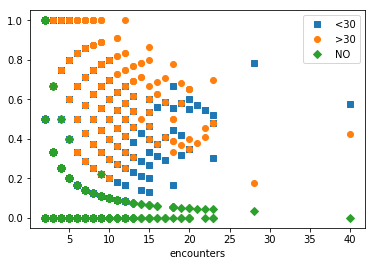

In [6]:
# Note: each point represent a siggle patient with mulifple encounters
mark=np.array(['s', 'o', 'D', 'v'])
Lj=len(j_readim)
j=0
while j < Lj:
    plt.plot(r1[:m],y_nbr[:,j], marker=mark[j],linestyle = 'None',label=j_readim[j])
    j+=1
plt.legend(loc='upper right')
plt.xlabel('encounters')

Text(0.5,0,'encounters')

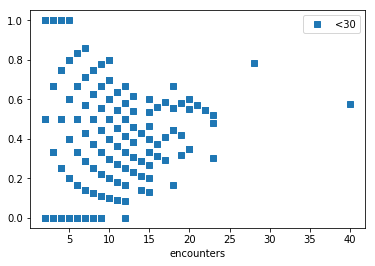

In [7]:
# Note: each point represent a siggle patient with mulifple encounters
plt.plot(r1[:m],y_nbr[:,0], marker=mark[0],linestyle = 'None',label=j_readim[0])

plt.legend(loc='upper right')
plt.xlabel('encounters')

Text(0.5,0,'encounters')

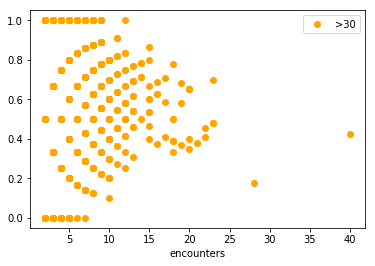

In [8]:
# Note: each point represent a siggle patient with mulifple encounters
plt.plot(r1[:m],y_nbr[:,1], marker=mark[1],color='orange',linestyle = 'None',label=j_readim[1])

plt.legend(loc='upper right')
plt.xlabel('encounters')

Text(0.5,0,'encounters')

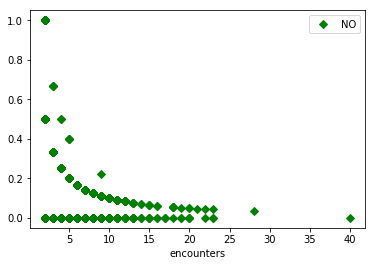

In [9]:
# Note: each point represent a siggle patient with mulifple encounters
plt.plot(r1[:m],y_nbr[:,2], marker=mark[2],color='green',linestyle = 'None',label=j_readim[2])

plt.legend(loc='upper right')
plt.xlabel('encounters')
#print(y_nbr[:,2])

Text(0.5,1,'Data distrbution: encounter of individual patients')

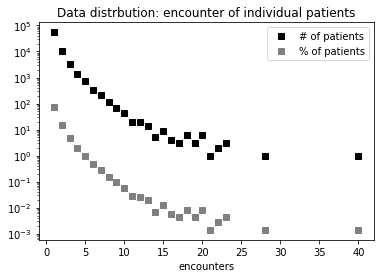

In [115]:
Prc_en_count=100*en_count/en_count.sum()

en_count = en_count.astype('float')
en_count[en_count==0]=['nan']
Prc_en_count[Prc_en_count==0]=['nan']

plt.semilogy(en_count,marker='s',color='black',linestyle = 'None',label='# of patients')
plt.semilogy(Prc_en_count,marker='s',color='gray',linestyle = 'None',label='% of patients')
plt.legend(loc='upper right')
plt.xlabel('encounters')
plt.title('Data distrbution: encounter of individual patients')

Text(0.5,0,'encounters')

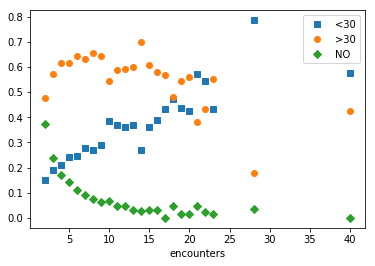

In [11]:

en_count=np.bincount(r1)
en_size=en_count.size
y_en=np.array([])
x_en=np.array([])

i=2
while i < en_size:
    if en_count[i] > 0:
        x_en = np.append(x_en,i)
        n1= en_count[i:].sum()
        n0= n1-en_count[i]
        y_en = np.append(y_en,y_nbr[n0:n1,0].mean())
        y_en = np.append(y_en,y_nbr[n0:n1,1].mean())
        y_en = np.append(y_en,y_nbr[n0:n1,2].mean())
    i+=1
Lj=len(j_readim)
m1=int(len(y_en)/Lj)

y_en=np.resize(y_en,(m1,Lj)) 
plt.plot(x_en,y_en[:,0], marker=mark[0],linestyle = 'None',label=j_readim[0])
plt.plot(x_en,y_en[:,1], marker=mark[1],linestyle = 'None',label=j_readim[1])
plt.plot(x_en,y_en[:,2], marker=mark[2],linestyle = 'None',label=j_readim[2])
plt.legend(loc='upper right')
plt.xlabel('encounters')

In [12]:
df['readmitted'][df['gender'] == 'Female'].value_counts()

NO     29038
>30    19518
<30     6152
Name: readmitted, dtype: int64

Text(0.5,1,'Data distrbution: age')

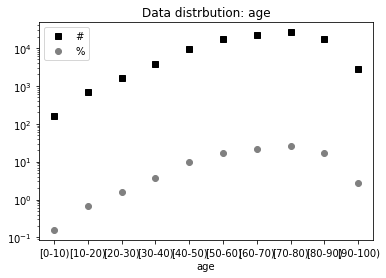

In [116]:
n_total= max(1,df['age'].count())
n_count=df['age'].value_counts().sort_index()
Prt_count=100*n_count/n_total
plt.semilogy(n_count,marker='s',color='black',linestyle='none',label='#')
plt.semilogy(Prt_count,marker='o',color='gray',linestyle='none',label='%')
plt.xlabel('age')
plt.legend(loc='upper left')
plt.title('Data distrbution: age')

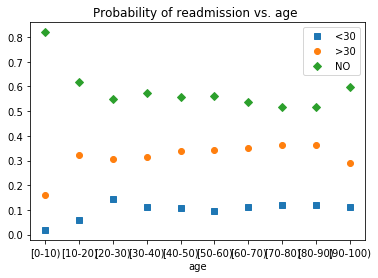

In [31]:
i_age=np.array(df['age'].value_counts().sort_index().keys().tolist())
L=len(i_age)
Lj=len(j_readim)

x_age = np.array([])
y_age = np.array([])


i = 0

while i < L:
    n = max(1,df['readmitted'][df['age'] == i_age[i]].count())
    
    if n > 100:
        x_age = np.append(x_age,i_age[i])
        j=0
        while j < Lj:
            x = df['readmitted'][df['age']== i_age[i]][df['readmitted'] == j_readim[j]].count()/n                
            y_age = np.append(y_age,x)
            j+=1
    i+=1
                                  
L1=len(x_age)    
y_age=np.resize(y_age,(L1,Lj))


plt.plot(x_age,y_age[:,0],label='<30',marker=mark[0],linestyle='none') 
plt.plot(x_age,y_age[:,1],label='>30',marker=mark[1],linestyle='none') 
plt.plot(x_age,y_age[:,2],label='NO',marker=mark[2],linestyle='none') 
plt.title('Probability of readmission vs. age ')
plt.xlabel('age')
plt.legend(loc='upper right')


In [28]:
df['readmitted'][df['gender'] == 'Male'].value_counts()

NO     25823
>30    16027
<30     5205
Name: readmitted, dtype: int64

Text(0.5,1,'Data distrbution: number_diagnoses')

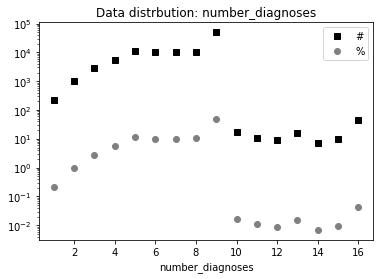

In [117]:
n_total= max(1,df['number_diagnoses'].count())
n_diag_count=df['number_diagnoses'].value_counts()
Prt_diag_count=100*n_diag_count/n_total
plt.semilogy(n_diag_count,marker='s',color='black',linestyle='none',label='#')
plt.semilogy(Prt_diag_count,marker='o',color='gray',linestyle='none',label='%')
plt.xlabel('number_diagnoses')
plt.legend(loc='upper right')
plt.title('Data distrbution: number_diagnoses')

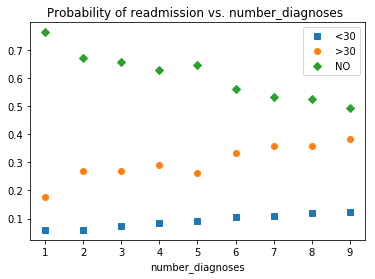

In [211]:
i_diag=np.array(df['number_diagnoses'].value_counts().sort_index().keys().tolist())
L=len(i_diag)
Lj=len(j_readim)

x_diag = np.array([])
y_diag = np.array([])


i = 0

while i < L:
    n = max(1,df['readmitted'][df['number_diagnoses'] == i_diag[i]].count())
    
    if n > 100:
        x_diag = np.append(x_diag,i_diag[i])
        j=0
        while j < Lj:
            x = df['readmitted'][df['number_diagnoses']== i_diag[i]][df['readmitted'] == j_readim[j]].count()/n                
            y_diag = np.append(y_diag,x)
            j+=1
    i+=1
                                 
L1=len(x_diag)

y_diag=np.resize(y_diag,(L1,Lj))


plt.plot(x_diag,y_diag[:,0],label='<30',marker=mark[0],linestyle='none') 
plt.plot(x_diag,y_diag[:,1],label='>30',marker=mark[1],linestyle='none') 
plt.plot(x_diag,y_diag[:,2],label='NO',marker=mark[2],linestyle='none') 
plt.title('Probability of readmission vs. number_diagnoses ')
plt.xlabel('number_diagnoses')
plt.legend(loc='upper right')


In [35]:
df['readmitted'][df['number_diagnoses'] == 1].value_counts().sort_index()

<30     13
>30     39
NO     167
Name: readmitted, dtype: int64

[0.04795979 0.00866336] [0.19099512 0.02182945]
[array([5.31703164e-05]), 2, array([1.37423554, 0.33388124]), 1.9984014443252818e-15] [array([0.00446543]), 2, array([1.37423554, 0.33388124]), 1.9984014443252818e-15]


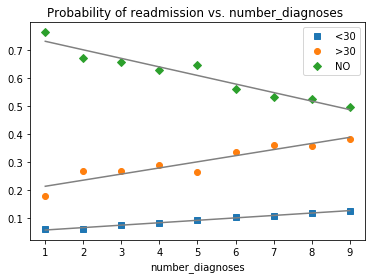

In [218]:
# linear 
from numpy.polynomial import polynomial as P
c_0, stats_0= P.polyfit(x_diag,y_diag[:,0],1,full=True)
c_1, stats_1= P.polyfit(x_diag,y_diag[:,1],1,full=True)
print(c_0,c_1)
print(stats_0, stats_1)
p0 = np.poly1d(np.polyfit(x_diag, y_diag[:,0], 1))
p1 = np.poly1d(np.polyfit(x_diag, y_diag[:,1], 1))
t = np.linspace(1, 9, 800)
plt.plot(x_diag,y_diag[:,0],label='<30',marker=mark[0],linestyle='none') 
plt.plot(x_diag,y_diag[:,1],label='>30',marker=mark[1],linestyle='none') 
plt.plot(x_diag,y_diag[:,2],label='NO',marker=mark[2],linestyle='none') 
plt.plot(t,p0(t),color='gray')
plt.plot(t,p1(t),color='gray')
plt.plot(t,1-p0(t)-p1(t),color='gray')
plt.title('Probability of readmission vs. number_diagnoses ')
plt.xlabel('number_diagnoses')
plt.legend(loc='upper right')


Text(0.5,1,'Data distrbution: race')

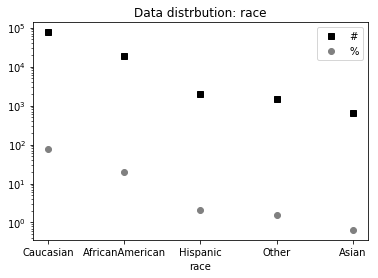

In [183]:
n_total= max(1,df['race'].count())
n_count=df['race'].value_counts()
Prt_count=100*n_count/n_total
plt.semilogy(n_count,marker='s',color='black',linestyle='none',label='#')
plt.semilogy(Prt_count,marker='o',color='gray',linestyle='none',label='%')
plt.xlabel('race')
plt.legend(loc='upper right')
plt.title('Data distrbution: race')

(0, 1)

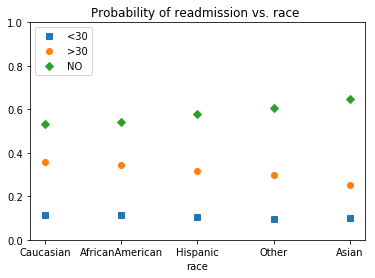

In [44]:
i_char=np.array(df['race'].value_counts().keys().tolist())
L=len(i_char)
Lj=len(j_readim)

x_char = np.array([])
y_char = np.array([])


i = 0

while i < L:
    n = max(1,df['readmitted'][df['race'] == i_char[i]].count())
    
    if n > 100:
        x_char = np.append(x_char,i_char[i])
        j=0
        while j < Lj:
            x = df['readmitted'][df['race']== i_char[i]][df['readmitted'] == j_readim[j]].count()/n                
            y_char = np.append(y_char,x)
            j+=1
    i+=1
                                  
L1=len(x_char)    
y_char=np.resize(y_char,(L1,Lj))

plt.plot(x_char,y_char[:,0],label='<30',marker=mark[0],linestyle='none') 
plt.plot(x_char,y_char[:,1],label='>30',marker=mark[1],linestyle='none') 
plt.plot(x_char,y_char[:,2],label='NO',marker=mark[2],linestyle='none') 
plt.title('Probability of readmission vs. race ')
plt.xlabel('race')
plt.legend(loc='upper left')
plt.ylim(0, 1)

In [5]:
values = df['gender'].value_counts().keys().tolist()
counts = df['gender'].value_counts().tolist()
print(values)
print(counts)

['Female', 'Male', 'Unknown/Invalid']
[54708, 47055, 3]


Text(0.5,1,'Data distrbution: gender')

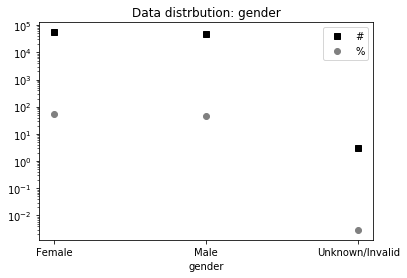

In [119]:
n_total= max(1,df['gender'].count())
n_count=df['gender'].value_counts()
Prt_count=100*n_count/n_total
plt.semilogy(n_count,marker='s',color='black',linestyle='none',label='#')
plt.semilogy(Prt_count,marker='o',color='gray',linestyle='none',label='%')
plt.xlabel('gender')
plt.legend(loc='upper right')
plt.title('Data distrbution: gender')

(0, 1)

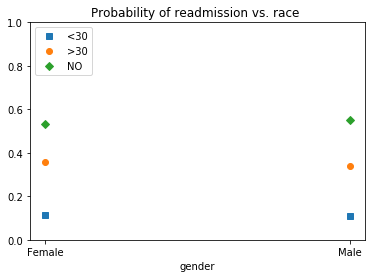

In [46]:
i_char=np.array(df['gender'].value_counts().keys().tolist())
L=len(i_char)
Lj=len(j_readim)

x_char = np.array([])
y_char = np.array([])


i = 0

while i < L:
    n = max(1,df['readmitted'][df['gender'] == i_char[i]].count())
    
    if n > 100:
        x_char = np.append(x_char,i_char[i])
        j=0
        while j < Lj:
            x = df['readmitted'][df['gender']== i_char[i]][df['readmitted'] == j_readim[j]].count()/n                
            y_char = np.append(y_char,x)
            j+=1
    i+=1
                                  
L1=len(x_char)    
y_char=np.resize(y_char,(L1,Lj))

plt.plot(x_char,y_char[:,0],label='<30',marker=mark[0],linestyle='none') 
plt.plot(x_char,y_char[:,1],label='>30',marker=mark[1],linestyle='none') 
plt.plot(x_char,y_char[:,2],label='NO',marker=mark[2],linestyle='none') 
plt.title('Probability of readmission vs. race ')
plt.xlabel('gender')
plt.legend(loc='upper left')
plt.ylim(0, 1)

Text(0.5,1,'Data distrbution: admission_type_id')

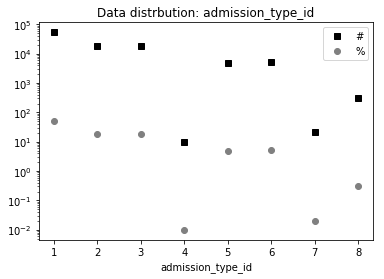

In [120]:
#admission_type_id description
#1 Emergency
#2 Urgent
#3 Elective
#4 Newborn
#5 Not Available
#6 NULL
#7 Trauma Center
#8 Not Mapped

n_total= max(1,df['admission_type_id'].count())
n_count=df['admission_type_id'].value_counts()
Prt_count=100*n_count/n_total
plt.semilogy(n_count,marker='s',color='black',linestyle='none',label='#')
plt.semilogy(Prt_count,marker='o',color='gray',linestyle='none',label='%')
plt.xlabel('admission_type_id')
plt.legend(loc='upper right')
plt.title('Data distrbution: admission_type_id')

(0, 1)

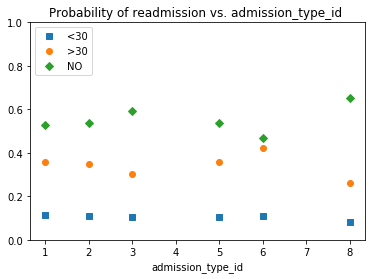

In [52]:
i_char=np.array(df['admission_type_id'].value_counts().keys().tolist())
L=len(i_char)
Lj=len(j_readim)

x_char = np.array([])
y_char = np.array([])


i = 0

while i < L:
    n = max(1,df['readmitted'][df['admission_type_id'] == i_char[i]].count())
    
    if n > 100:
        x_char = np.append(x_char,i_char[i])
        j=0
        while j < Lj:
            x = df['readmitted'][df['admission_type_id']== i_char[i]][df['readmitted'] == j_readim[j]].count()/n                
            y_char = np.append(y_char,x)
            j+=1
    i+=1
                                  
L1=len(x_char)    
y_char=np.resize(y_char,(L1,Lj))

plt.plot(x_char,y_char[:,0],label='<30',marker=mark[0],linestyle='none') 
plt.plot(x_char,y_char[:,1],label='>30',marker=mark[1],linestyle='none') 
plt.plot(x_char,y_char[:,2],label='NO',marker=mark[2],linestyle='none') 
plt.title('Probability of readmission vs. admission_type_id ')
plt.xlabel('admission_type_id')
plt.legend(loc='upper left')
plt.ylim(0, 1)

In [174]:
values = df1['discharge_disposition_id'].value_counts().keys().tolist()
counts = df1['discharge_disposition_id'].value_counts().tolist()
print(values)
print(counts)

[1, 3, 6, 18, 2, 22, 11, 5, 25, 4, 7, 23, 13, 14, 28, 8, 15, 24, 9, 17, 16, 19, 10, 27, 12, 20]
[60234, 13954, 12902, 3691, 2128, 1993, 1642, 1184, 989, 815, 623, 412, 399, 372, 139, 108, 63, 48, 21, 14, 11, 8, 6, 5, 3, 2]


Text(0.5,1,'Data distrbution: discharge_disposition_id')

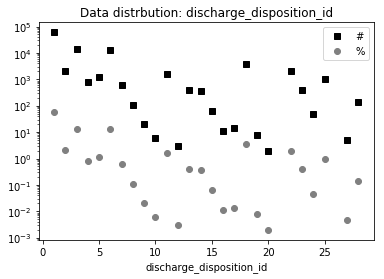

In [121]:
#discharge_disposition_id	description
#1	Discharged to home
#2	Discharged/transferred to another short term hospital
#3	Discharged/transferred to SNF
#4	Discharged/transferred to ICF
#5	Discharged/transferred to another type of inpatient care institution
#6	Discharged/transferred to home with home health service
#7	Left AMA
#8	Discharged/transferred to home under care of Home IV provider
#9	Admitted as an inpatient to this hospital
#10	Neonate discharged to another hospital for neonatal aftercare
#11	Expired
#12	Still patient or expected to return for outpatient services
#13	Hospice / home
#14	Hospice / medical facility
#15	Discharged/transferred within this institution to Medicare approved swing bed
#16	Discharged/transferred/referred another institution for outpatient services
#17	Discharged/transferred/referred to this institution for outpatient services
#18	NULL
#19	Expired at home. Medicaid only, hospice.
#20	Expired in a medical facility. Medicaid only, hospice.
#21	Expired, place unknown. Medicaid only, hospice.
#22	Discharged/transferred to another rehab fac including rehab units of a hospital .
#23	Discharged/transferred to a long term care hospital.
#24	Discharged/transferred to a nursing facility certified under Medicaid but not certified under Medicare.
#25	Not Mapped
#26	Unknown/Invalid
#30	Discharged/transferred to another Type of Health Care Institution not Defined Elsewhere
#27	Discharged/transferred to a federal health care facility.
#28	Discharged/transferred/referred to a psychiatric hospital of psychiatric distinct part unit of a hospital
#29	Discharged/transferred to a Critical Access Hospital (CAH).

n_total= max(1,df['discharge_disposition_id'].count())
n_count=df['discharge_disposition_id'].value_counts()
Prt_count=100*n_count/n_total
plt.semilogy(n_count,marker='s',color='black',linestyle='none',label='#')
plt.semilogy(Prt_count,marker='o',color='gray',linestyle='none',label='%')
plt.xlabel('discharge_disposition_id')
plt.legend(loc='upper right')
plt.title('Data distrbution: discharge_disposition_id')

(0, 1)

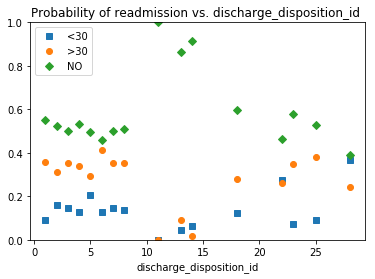

In [50]:
i_char=np.array(df['discharge_disposition_id'].value_counts().keys().tolist())
L=len(i_char)
Lj=len(j_readim)

x_char = np.array([])
y_char = np.array([])


i = 0

while i < L:
    n = max(1,df['readmitted'][df['discharge_disposition_id'] == i_char[i]].count())
    
    if n > 100:
        x_char = np.append(x_char,i_char[i])
        j=0
        while j < Lj:
            x = df['readmitted'][df['discharge_disposition_id']== i_char[i]][df['readmitted'] == j_readim[j]].count()/n                
            y_char = np.append(y_char,x)
            j+=1
    i+=1
                                  
L1=len(x_char)    
y_char=np.resize(y_char,(L1,Lj))

plt.plot(x_char,y_char[:,0],label='<30',marker=mark[0],linestyle='none') 
plt.plot(x_char,y_char[:,1],label='>30',marker=mark[1],linestyle='none') 
plt.plot(x_char,y_char[:,2],label='NO',marker=mark[2],linestyle='none') 
plt.title('Probability of readmission vs. discharge_disposition_id ')
plt.xlabel('discharge_disposition_id')
plt.legend(loc='upper left')
plt.ylim(0, 1)

In [5]:
values = df1['admission_source_id'].value_counts().keys().tolist()
counts = df1['admission_source_id'].value_counts().tolist()
print(values)
print(counts)

[7, 1, 17, 4, 6, 2, 5, 3, 20, 9, 8, 22, 10, 11, 14, 25, 13]
[57494, 29565, 6781, 3187, 2264, 1104, 855, 187, 161, 125, 16, 12, 8, 2, 2, 2, 1]


Text(0.5,1,'Data distrbution: admission_source_id')

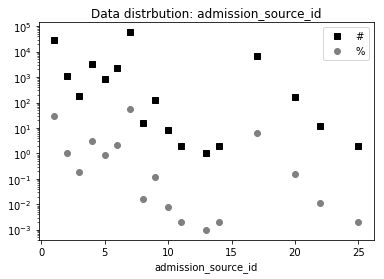

In [122]:
# admission_source_id	description
# 1 Physician Referral
# 2 Clinic Referral
# 3 HMO Referral
# 4	Transfer from a hospital
# 5	 Transfer from a Skilled Nursing Facility (SNF)
# 6	 Transfer from another health care facility
# 7	 Emergency Room
# 8	 Court/Law Enforcement
# 9	 Not Available
# 10	 Transfer from critial access hospital
# 11	Normal Delivery
# 12	 Premature Delivery
# 13	 Sick Baby
# 14	 Extramural Birth
# 15	Not Available
# 17	NULL
# 18	 Transfer From Another Home Health Agency
# 19	Readmission to Same Home Health Agency
# 20	 Not Mapped
# 21	Unknown/Invalid
# 22	 Transfer from hospital inpt/same fac reslt in a sep claim
# 23	 Born inside this hospital
# 24	 Born outside this hospital
# 25	 Transfer from Ambulatory Surgery Center
# 26	Transfer from Hospice2	Clinic Referral

n_total= max(1,df['admission_source_id'].count())
n_count=df['admission_source_id'].value_counts()
Prt_count=100*n_count/n_total
plt.semilogy(n_count,marker='s',color='black',linestyle='none',label='#')
plt.semilogy(Prt_count,marker='o',color='gray',linestyle='none',label='%')
plt.xlabel('admission_source_id')
plt.legend(loc='upper right')
plt.title('Data distrbution: admission_source_id')

(0, 26)

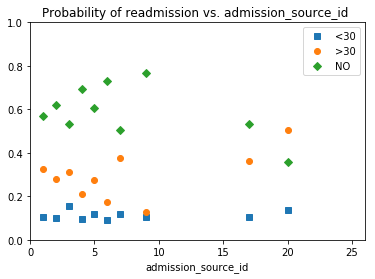

In [61]:
i_char=np.array(df['admission_source_id'].value_counts().keys().tolist())
L=len(i_char)
Lj=len(j_readim)

x_char = np.array([])
y_char = np.array([])


i = 0

while i < L:
    n = max(1,df['readmitted'][df['admission_source_id'] == i_char[i]].count())
    
    if n > 100:
        x_char = np.append(x_char,i_char[i])
        j=0
        while j < Lj:
            x = df['readmitted'][df['admission_source_id']== i_char[i]][df['readmitted'] == j_readim[j]].count()/n                
            y_char = np.append(y_char,x)
            j+=1
    i+=1
                                  
L1=len(x_char)    
y_char=np.resize(y_char,(L1,Lj))

plt.plot(x_char,y_char[:,0],label='<30',marker=mark[0],linestyle='none') 
plt.plot(x_char,y_char[:,1],label='>30',marker=mark[1],linestyle='none') 
plt.plot(x_char,y_char[:,2],label='NO',marker=mark[2],linestyle='none') 
plt.title('Probability of readmission vs. admission_source_id ')
plt.xlabel('admission_source_id')
plt.legend(loc='upper right')
plt.ylim(0, 1)
plt.xlim(0, 26)

Text(0.5,1,'Data distrbution: time_in_hospital')

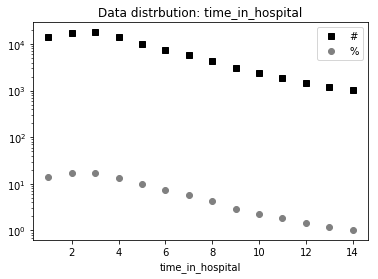

In [149]:
n_total= max(1,df['time_in_hospital'].count())
n_count=df['time_in_hospital'].value_counts()
Prt_count=100*n_count/n_total
plt.semilogy(n_count,marker='s',color='black',linestyle='none',label='#')
plt.semilogy(Prt_count,marker='o',color='gray',linestyle='none',label='%')
plt.xlabel('time_in_hospital')
plt.legend(loc='upper right')
plt.title('Data distrbution: time_in_hospital')

(0, 1)

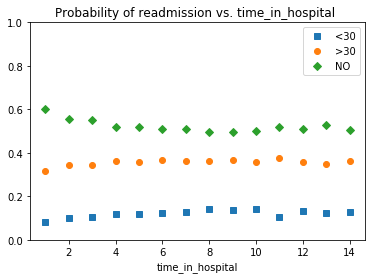

In [63]:
i_char=np.array(df['time_in_hospital'].value_counts().keys().tolist())
L=len(i_char)
Lj=len(j_readim)

x_char = np.array([])
y_char = np.array([])


i = 0

while i < L:
    n = max(1,df['readmitted'][df['time_in_hospital'] == i_char[i]].count())
    
    if n > 100:
        x_char = np.append(x_char,i_char[i])
        j=0
        while j < Lj:
            x = df['readmitted'][df['time_in_hospital']== i_char[i]][df['readmitted'] == j_readim[j]].count()/n                
            y_char = np.append(y_char,x)
            j+=1
    i+=1
                                  
L1=len(x_char)    
y_char=np.resize(y_char,(L1,Lj))

plt.plot(x_char,y_char[:,0],label='<30',marker=mark[0],linestyle='none') 
plt.plot(x_char,y_char[:,1],label='>30',marker=mark[1],linestyle='none') 
plt.plot(x_char,y_char[:,2],label='NO',marker=mark[2],linestyle='none') 
plt.title('Probability of readmission vs. time_in_hospital ')
plt.xlabel('time_in_hospital')
plt.legend(loc='upper right')
plt.ylim(0, 1)


In [13]:
values = df1['payer_code'].value_counts().keys().tolist()
counts = df1['payer_code'].value_counts().tolist()
print(values)
print(counts)

['MC', 'HM', 'SP', 'BC', 'MD', 'CP', 'UN', 'CM', 'OG', 'PO', 'DM', 'CH', 'WC', 'OT', 'MP', 'SI', 'FR']
[32439, 6274, 5007, 4655, 3532, 2533, 2448, 1937, 1033, 592, 549, 146, 135, 95, 79, 55, 1]


Text(0.5,1,'Data distrbution: payer_code')

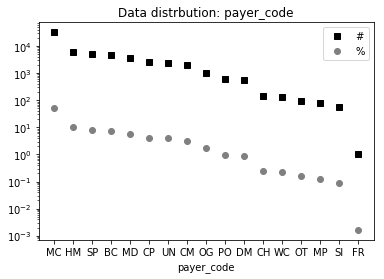

In [150]:
n_total= max(1,df['payer_code'].count())
n_count=df['payer_code'].value_counts()
Prt_count=100*n_count/n_total
plt.semilogy(n_count,marker='s',color='black',linestyle='none',label='#')
plt.semilogy(Prt_count,marker='o',color='gray',linestyle='none',label='%')
plt.xlabel('payer_code')
plt.legend(loc='upper right')
plt.title('Data distrbution: payer_code')

(0, 1)

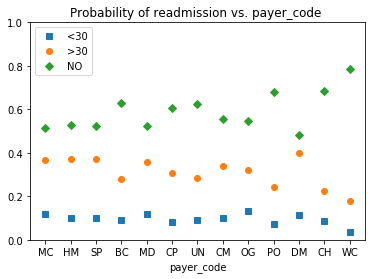

In [66]:
i_char=np.array(df['payer_code'].value_counts().keys().tolist())
L=len(i_char)
Lj=len(j_readim)

x_char = np.array([])
y_char = np.array([])


i = 0

while i < L:
    n = max(1,df['readmitted'][df['payer_code'] == i_char[i]].count())
    
    if n > 100:
        x_char = np.append(x_char,i_char[i])
        j=0
        while j < Lj:
            x = df['readmitted'][df['payer_code']== i_char[i]][df['readmitted'] == j_readim[j]].count()/n                
            y_char = np.append(y_char,x)
            j+=1
    i+=1
                                  
L1=len(x_char)    
y_char=np.resize(y_char,(L1,Lj))

plt.plot(x_char,y_char[:,0],label='<30',marker=mark[0],linestyle='none') 
plt.plot(x_char,y_char[:,1],label='>30',marker=mark[1],linestyle='none') 
plt.plot(x_char,y_char[:,2],label='NO',marker=mark[2],linestyle='none') 
plt.title('Probability of readmission vs. payer_code ')
plt.xlabel('payer_code')
plt.legend(loc='upper left')
plt.ylim(0, 1)

Text(0.5,1,'Data distrbution: medical_specialty')

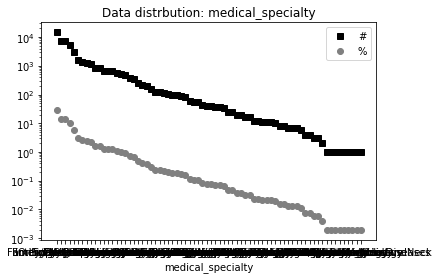

In [151]:
n_total= max(1,df['medical_specialty'].count())
n_count=df['medical_specialty'].value_counts()
Prt_count=100*n_count/n_total
plt.semilogy(n_count,marker='s',color='black',linestyle='none',label='#')
plt.semilogy(Prt_count,marker='o',color='gray',linestyle='none',label='%')
plt.xlabel('medical_specialty')
plt.legend(loc='upper right')
plt.title('Data distrbution: medical_specialty')

(0, 1)

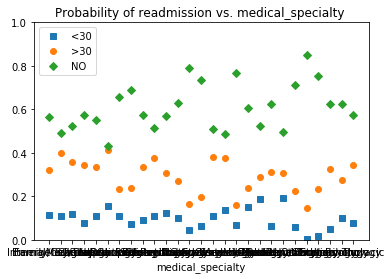

In [68]:
i_char=np.array(df['medical_specialty'].value_counts().keys().tolist())
L=len(i_char)
Lj=len(j_readim)

x_char = np.array([])
y_char = np.array([])


i = 0

while i < L:
    n = max(1,df['readmitted'][df['medical_specialty'] == i_char[i]].count())
    
    if n > 100:
        x_char = np.append(x_char,i_char[i])
        j=0
        while j < Lj:
            x = df['readmitted'][df['medical_specialty']== i_char[i]][df['readmitted'] == j_readim[j]].count()/n                
            y_char = np.append(y_char,x)
            j+=1
    i+=1
                                  
L1=len(x_char)    
y_char=np.resize(y_char,(L1,Lj))

plt.plot(x_char,y_char[:,0],label='<30',marker=mark[0],linestyle='none') 
plt.plot(x_char,y_char[:,1],label='>30',marker=mark[1],linestyle='none') 
plt.plot(x_char,y_char[:,2],label='NO',marker=mark[2],linestyle='none') 
plt.title('Probability of readmission vs. medical_specialty ')
plt.xlabel('medical_specialty')
plt.legend(loc='upper left')
plt.ylim(0, 1)

Text(0.5,1,'Data distrbution: number_outpatient')

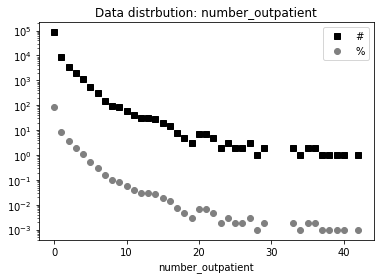

In [152]:
n_total= max(1,df['number_outpatient'].count())
n_count=df['number_outpatient'].value_counts()
Prt_count=100*n_count/n_total
plt.semilogy(n_count,marker='s',color='black',linestyle='none',label='#')
plt.semilogy(Prt_count,marker='o',color='gray',linestyle='none',label='%')
plt.xlabel('number_outpatient')
plt.legend(loc='upper right')
plt.title('Data distrbution: number_outpatient')

(0, 1)

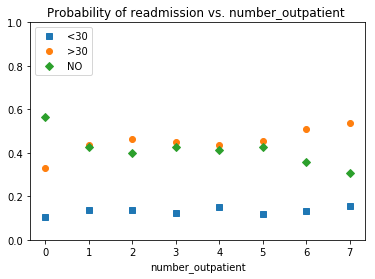

In [70]:
i_char=np.array(df['number_outpatient'].value_counts().keys().tolist())
L=len(i_char)
Lj=len(j_readim)

x_char = np.array([])
y_char = np.array([])


i = 0

while i < L:
    n = max(1,df['readmitted'][df['number_outpatient'] == i_char[i]].count())
    
    if n > 100:
        x_char = np.append(x_char,i_char[i])
        j=0
        while j < Lj:
            x = df['readmitted'][df['number_outpatient']== i_char[i]][df['readmitted'] == j_readim[j]].count()/n                
            y_char = np.append(y_char,x)
            j+=1
    i+=1
                                  
L1=len(x_char)    
y_char=np.resize(y_char,(L1,Lj))

plt.plot(x_char,y_char[:,0],label='<30',marker=mark[0],linestyle='none') 
plt.plot(x_char,y_char[:,1],label='>30',marker=mark[1],linestyle='none') 
plt.plot(x_char,y_char[:,2],label='NO',marker=mark[2],linestyle='none') 
plt.title('Probability of readmission vs. number_outpatient ')
plt.xlabel('number_outpatient')
plt.legend(loc='upper left')
plt.ylim(0, 1)

Text(0.5,1,'Data distrbution: num_lab_procedures')

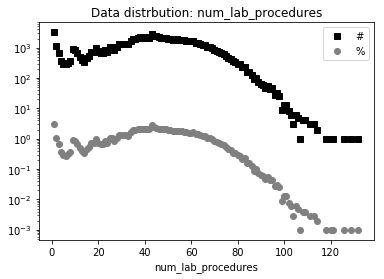

In [153]:
n_total= max(1,df['num_lab_procedures'].count())
n_count=df['num_lab_procedures'].value_counts()
Prt_count=100*n_count/n_total
plt.semilogy(n_count,marker='s',color='black',linestyle='none',label='#')
plt.semilogy(Prt_count,marker='o',color='gray',linestyle='none',label='%')
plt.xlabel('num_lab_procedures')
plt.legend(loc='upper right')
plt.title('Data distrbution: num_lab_procedures')

(0, 1)

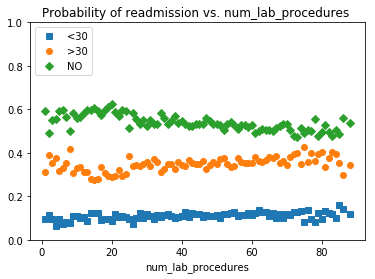

In [72]:
i_char=np.array(df['num_lab_procedures'].value_counts().keys().tolist())
L=len(i_char)
Lj=len(j_readim)

x_char = np.array([])
y_char = np.array([])


i = 0

while i < L:
    n = max(1,df['readmitted'][df['num_lab_procedures'] == i_char[i]].count())
    
    if n > 100:
        x_char = np.append(x_char,i_char[i])
        j=0
        while j < Lj:
            x = df['readmitted'][df['num_lab_procedures']== i_char[i]][df['readmitted'] == j_readim[j]].count()/n                
            y_char = np.append(y_char,x)
            j+=1
    i+=1
                                  
L1=len(x_char)    
y_char=np.resize(y_char,(L1,Lj))

plt.plot(x_char,y_char[:,0],label='<30',marker=mark[0],linestyle='none') 
plt.plot(x_char,y_char[:,1],label='>30',marker=mark[1],linestyle='none') 
plt.plot(x_char,y_char[:,2],label='NO',marker=mark[2],linestyle='none') 
plt.title('Probability of readmission vs. num_lab_procedures ')
plt.xlabel('num_lab_procedures')
plt.legend(loc='upper left')
plt.ylim(0, 1)

Text(0.5,1,'Data distrbution: num_procedures')

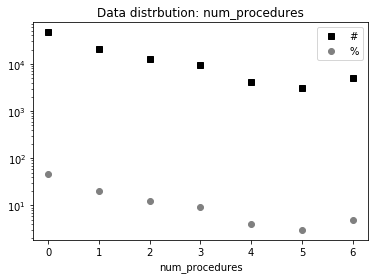

In [154]:
n_total= max(1,df['num_procedures'].count())
n_count=df['num_procedures'].value_counts()
Prt_count=100*n_count/n_total
plt.semilogy(n_count,marker='s',color='black',linestyle='none',label='#')
plt.semilogy(Prt_count,marker='o',color='gray',linestyle='none',label='%')
plt.xlabel('num_procedures')
plt.legend(loc='upper right')
plt.title('Data distrbution: num_procedures')

(0, 1)

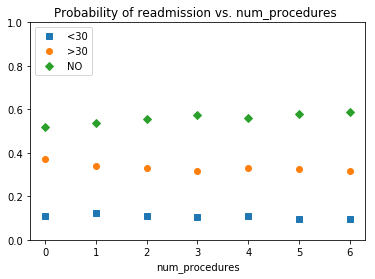

In [74]:
i_char=np.array(df['num_procedures'].value_counts().keys().tolist())
L=len(i_char)
Lj=len(j_readim)

x_char = np.array([])
y_char = np.array([])


i = 0

while i < L:
    n = max(1,df['readmitted'][df['num_procedures'] == i_char[i]].count())
    
    if n > 100:
        x_char = np.append(x_char,i_char[i])
        j=0
        while j < Lj:
            x = df['readmitted'][df['num_procedures']== i_char[i]][df['readmitted'] == j_readim[j]].count()/n                
            y_char = np.append(y_char,x)
            j+=1
    i+=1
                                  
L1=len(x_char)    
y_char=np.resize(y_char,(L1,Lj))

plt.plot(x_char,y_char[:,0],label='<30',marker=mark[0],linestyle='none') 
plt.plot(x_char,y_char[:,1],label='>30',marker=mark[1],linestyle='none') 
plt.plot(x_char,y_char[:,2],label='NO',marker=mark[2],linestyle='none') 
plt.title('Probability of readmission vs. num_procedures ')
plt.xlabel('num_procedures')
plt.legend(loc='upper left')
plt.ylim(0, 1)

Text(0.5,1,'Data distrbution: num_medications')

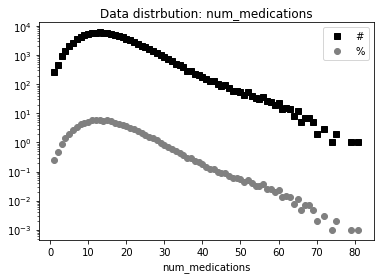

In [9]:
n_total= max(1,df['num_medications'].count())
n_count=df['num_medications'].value_counts()
Prt_count=100*n_count/n_total
plt.semilogy(n_count,marker='s',color='black',linestyle='none',label='#')
plt.semilogy(Prt_count,marker='o',color='gray',linestyle='none',label='%')
plt.xlabel('num_medications')
plt.legend(loc='upper right')
plt.title('Data distrbution: num_medications')

(0, 1)

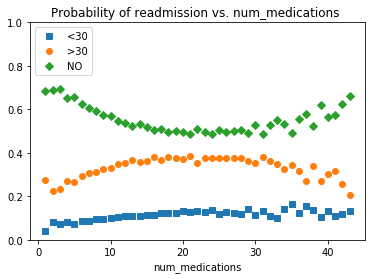

In [11]:
i_char=np.array(df['num_medications'].value_counts().sort_index().keys().tolist())
L=len(i_char)
Lj=len(j_readim)

x_char = np.array([])
y_char = np.array([])


i = 0

while i < L:
    n = max(1,df['readmitted'][df['num_medications'] == i_char[i]].count())
    
    if n > 100:
        x_char = np.append(x_char,i_char[i])
        j=0
        while j < Lj:
            x = df['readmitted'][df['num_medications']== i_char[i]][df['readmitted'] == j_readim[j]].count()/n                
            y_char = np.append(y_char,x)
            j+=1
    i+=1
                                  
L1=len(x_char)    
y_char=np.resize(y_char,(L1,Lj))

plt.plot(x_char,y_char[:,0],label='<30',marker=mark[0],linestyle='none') 
plt.plot(x_char,y_char[:,1],label='>30',marker=mark[1],linestyle='none') 
plt.plot(x_char,y_char[:,2],label='NO',marker=mark[2],linestyle='none') 
plt.title('Probability of readmission vs. num_medications ')
plt.xlabel('num_medications')
plt.legend(loc='upper left')
plt.ylim(0, 1)

(0, 1)

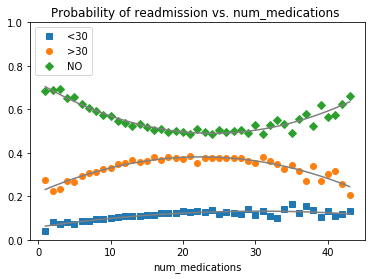

In [14]:
#2nd degree polynomial
p3 = np.poly1d(np.polyfit(x_char,y_char[:,1],2))
p4 = np.poly1d(np.polyfit(x_char,y_char[:,2],2))
t = np.linspace(1, 43, 4300)
plt.plot(x_char,y_char[:,0],label='<30',marker=mark[0],linestyle='none') 
plt.plot(x_char,y_char[:,1],label='>30',marker=mark[1],linestyle='none') 
plt.plot(x_char,y_char[:,2],label='NO',marker=mark[2],linestyle='none')
plt.plot(t,1-p3(t)-p4(t),color='gray')
plt.plot(t,p3(t),color='gray')
plt.plot(t,p4(t),color='gray')
plt.title('Probability of readmission vs. num_medications ')
plt.xlabel('num_medications')
plt.legend(loc='upper left')
plt.ylim(0, 1)

Text(0.5,1,'Data distrbution: age')

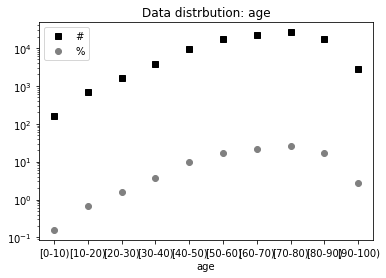

In [116]:
n_total= max(1,df['age'].count())
n_count=df['age'].value_counts().sort_index()
Prt_count=100*n_count/n_total
plt.semilogy(n_count,marker='s',color='black',linestyle='none',label='#')
plt.semilogy(Prt_count,marker='o',color='gray',linestyle='none',label='%')
plt.xlabel('age')
plt.legend(loc='upper left')
plt.title('Data distrbution: age')

(0, 1)

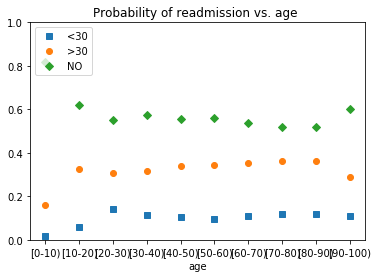

In [10]:
i_char=np.array(df['age'].value_counts().sort_index().keys().tolist())
L=len(i_char)
Lj=len(j_readim)

x_char = np.array([])
y_char = np.array([])


i = 0

while i < L:
    n = max(1,df['readmitted'][df['age'] == i_char[i]].count())
    
    if n > 100:
        x_char = np.append(x_char,i_char[i])
        j=0
        while j < Lj:
            x = df['readmitted'][df['age']== i_char[i]][df['readmitted'] == j_readim[j]].count()/n                
            y_char = np.append(y_char,x)
            j+=1
    i+=1
                                  
L1=len(x_char)    
y_char=np.resize(y_char,(L1,Lj))

plt.plot(x_char,y_char[:,0],label='<30',marker=mark[0],linestyle='none') 
plt.plot(x_char,y_char[:,1],label='>30',marker=mark[1],linestyle='none') 
plt.plot(x_char,y_char[:,2],label='NO',marker=mark[2],linestyle='none') 
plt.title('Probability of readmission vs. age ')
plt.xlabel('age')
plt.legend(loc='upper left')
plt.ylim(0, 1)

Text(0.5,1,'Data distrbution: number_inpatient')

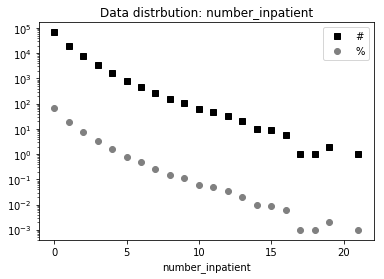

In [156]:
n_total= max(1,df['number_inpatient'].count())
n_count=df['number_inpatient'].value_counts()
Prt_count=100*n_count/n_total
plt.semilogy(n_count,marker='s',color='black',linestyle='none',label='#')
plt.semilogy(Prt_count,marker='o',color='gray',linestyle='none',label='%')
plt.xlabel('number_inpatient')
plt.legend(loc='upper right')
plt.title('Data distrbution: number_inpatient')

(0, 1)

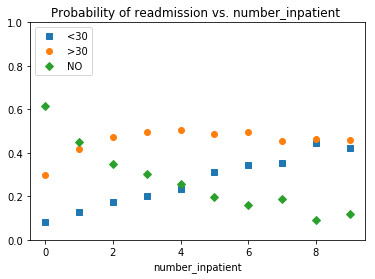

In [80]:
i_char=np.array(df['number_inpatient'].value_counts().keys().tolist())
L=len(i_char)
Lj=len(j_readim)

x_char = np.array([])
y_char = np.array([])


i = 0

while i < L:
    n = max(1,df['readmitted'][df['number_inpatient'] == i_char[i]].count())
    
    if n > 100:
        x_char = np.append(x_char,i_char[i])
        j=0
        while j < Lj:
            x = df['readmitted'][df['number_inpatient']== i_char[i]][df['readmitted'] == j_readim[j]].count()/n                
            y_char = np.append(y_char,x)
            j+=1
    i+=1
                                  
L1=len(x_char)    
y_char=np.resize(y_char,(L1,Lj))

plt.plot(x_char,y_char[:,0],label='<30',marker=mark[0],linestyle='none') 
plt.plot(x_char,y_char[:,1],label='>30',marker=mark[1],linestyle='none') 
plt.plot(x_char,y_char[:,2],label='NO',marker=mark[2],linestyle='none') 
plt.title('Probability of readmission vs. number_inpatient ')
plt.xlabel('number_inpatient')
plt.legend(loc='upper left')
plt.ylim(0, 1)

Text(0.5,1,'Data distrbution: number_emergency')

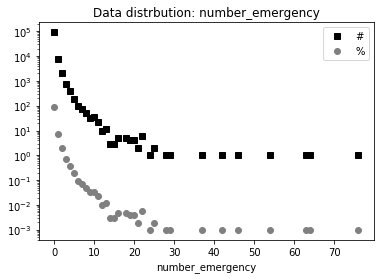

In [157]:
n_total= max(1,df['number_emergency'].count())
n_count=df['number_emergency'].value_counts()
Prt_count=100*n_count/n_total
plt.semilogy(n_count,marker='s',color='black',linestyle='none',label='#')
plt.semilogy(Prt_count,marker='o',color='gray',linestyle='none',label='%')
plt.xlabel('number_emergency')
plt.legend(loc='upper right')
plt.title('Data distrbution: number_emergency')

(0, 1)

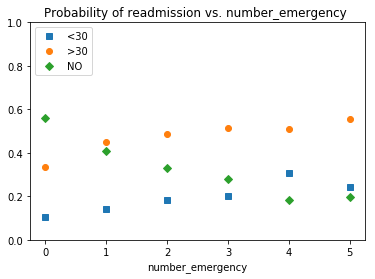

In [82]:
i_char=np.array(df['number_emergency'].value_counts().keys().tolist())
L=len(i_char)
Lj=len(j_readim)

x_char = np.array([])
y_char = np.array([])


i = 0

while i < L:
    n = max(1,df['readmitted'][df['number_emergency'] == i_char[i]].count())
    
    if n > 100:
        x_char = np.append(x_char,i_char[i])
        j=0
        while j < Lj:
            x = df['readmitted'][df['number_emergency']== i_char[i]][df['readmitted'] == j_readim[j]].count()/n                
            y_char = np.append(y_char,x)
            j+=1
    i+=1
                                  
L1=len(x_char)    
y_char=np.resize(y_char,(L1,Lj))

plt.plot(x_char,y_char[:,0],label='<30',marker=mark[0],linestyle='none') 
plt.plot(x_char,y_char[:,1],label='>30',marker=mark[1],linestyle='none') 
plt.plot(x_char,y_char[:,2],label='NO',marker=mark[2],linestyle='none') 
plt.title('Probability of readmission vs. number_emergency ')
plt.xlabel('number_emergency')
plt.legend(loc='upper left')
plt.ylim(0, 1)

In [69]:
values = df1['max_glu_serum'].value_counts().keys().tolist()
counts = df1['max_glu_serum'].value_counts().tolist()
print(values)
print(counts)

['None', 'Norm', '>200', '>300']
[96420, 2597, 1485, 1264]


Text(0.5,1,'Data distrbution: max_glu_serum')

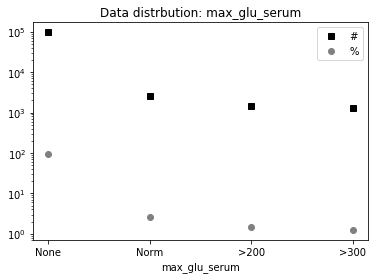

In [158]:
n_total= max(1,df['max_glu_serum'].count())
n_count=df['max_glu_serum'].value_counts()
Prt_count=100*n_count/n_total
plt.semilogy(n_count,marker='s',color='black',linestyle='none',label='#')
plt.semilogy(Prt_count,marker='o',color='gray',linestyle='none',label='%')
plt.xlabel('max_glu_serum')
plt.legend(loc='upper right')
plt.title('Data distrbution: max_glu_serum')

(0, 1)

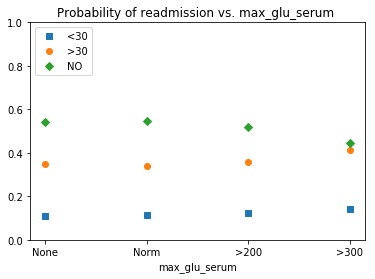

In [91]:
i_char=np.array(df['max_glu_serum'].value_counts().keys().tolist())
L=len(i_char)
Lj=len(j_readim)

x_char = np.array([])
y_char = np.array([])


i = 0

while i < L:
    n = max(1,df['readmitted'][df['max_glu_serum'] == i_char[i]].count())
    
    if n > 100:
        x_char = np.append(x_char,i_char[i])
        j=0
        while j < Lj:
            x = df['readmitted'][df['max_glu_serum']== i_char[i]][df['readmitted'] == j_readim[j]].count()/n                
            y_char = np.append(y_char,x)
            j+=1
    i+=1
                                  
L1=len(x_char)    
y_char=np.resize(y_char,(L1,Lj))

plt.plot(x_char,y_char[:,0],label='<30',marker=mark[0],linestyle='none') 
plt.plot(x_char,y_char[:,1],label='>30',marker=mark[1],linestyle='none') 
plt.plot(x_char,y_char[:,2],label='NO',marker=mark[2],linestyle='none') 
plt.title('Probability of readmission vs. max_glu_serum ')
plt.xlabel('max_glu_serum')
plt.legend(loc='upper left')
plt.ylim(0, 1)

Text(0.5,1,'Data distrbution: diag_1')

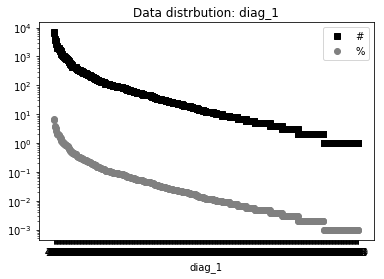

In [159]:
n_total= max(1,df['diag_1'].count())
n_count=df['diag_1'].value_counts()
Prt_count=100*n_count/n_total
plt.semilogy(n_count,marker='s',color='black',linestyle='none',label='#')
plt.semilogy(Prt_count,marker='o',color='gray',linestyle='none',label='%')
plt.xlabel('diag_1')
plt.legend(loc='upper right')
plt.title('Data distrbution: diag_1')

(0, 1)

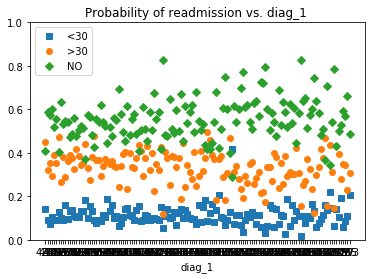

In [95]:
i_char=np.array(df['diag_1'].value_counts().keys().tolist())
L=len(i_char)
Lj=len(j_readim)

x_char = np.array([])
y_char = np.array([])


i = 0

while i < L:
    n = max(1,df['readmitted'][df['diag_1'] == i_char[i]].count())
    
    if n > 100:
        x_char = np.append(x_char,i_char[i])
        j=0
        while j < Lj:
            x = df['readmitted'][df['diag_1']== i_char[i]][df['readmitted'] == j_readim[j]].count()/n                
            y_char = np.append(y_char,x)
            j+=1
    i+=1
                                  
L1=len(x_char)    
y_char=np.resize(y_char,(L1,Lj))

plt.plot(x_char,y_char[:,0],label='<30',marker=mark[0],linestyle='none') 
plt.plot(x_char,y_char[:,1],label='>30',marker=mark[1],linestyle='none') 
plt.plot(x_char,y_char[:,2],label='NO',marker=mark[2],linestyle='none') 
plt.title('Probability of readmission vs. diag_1 ')
plt.xlabel('diag_1')
plt.legend(loc='upper left')
plt.ylim(0, 1)

Text(0.5,1,'Data distrbution: diag_2')

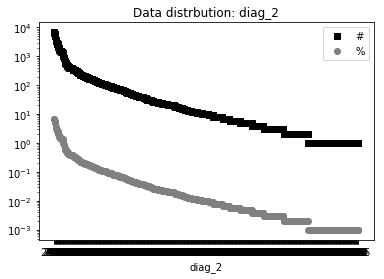

In [161]:
n_total= max(1,df['diag_2'].count())
n_count=df['diag_2'].value_counts()
Prt_count=100*n_count/n_total
plt.semilogy(n_count,marker='s',color='black',linestyle='none',label='#')
plt.semilogy(Prt_count,marker='o',color='gray',linestyle='none',label='%')
plt.xlabel('diag_2')
plt.legend(loc='upper right')
plt.title('Data distrbution: diag_2')

(0, 1)

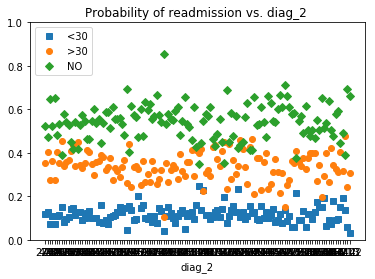

In [90]:
i_char=np.array(df['diag_2'].value_counts().keys().tolist())
L=len(i_char)
Lj=len(j_readim)

x_char = np.array([])
y_char = np.array([])


i = 0

while i < L:
    n = max(1,df['readmitted'][df['diag_2'] == i_char[i]].count())
    
    if n > 100:
        x_char = np.append(x_char,i_char[i])
        j=0
        while j < Lj:
            x = df['readmitted'][df['diag_2']== i_char[i]][df['readmitted'] == j_readim[j]].count()/n                
            y_char = np.append(y_char,x)
            j+=1
    i+=1
                                  
L1=len(x_char)    
y_char=np.resize(y_char,(L1,Lj))

plt.plot(x_char,y_char[:,0],label='<30',marker=mark[0],linestyle='none') 
plt.plot(x_char,y_char[:,1],label='>30',marker=mark[1],linestyle='none') 
plt.plot(x_char,y_char[:,2],label='NO',marker=mark[2],linestyle='none') 
plt.title('Probability of readmission vs. diag_2 ')
plt.xlabel('diag_2')
plt.legend(loc='upper left')
plt.ylim(0, 1)

Text(0.5,1,'Data distrbution: diag_3')

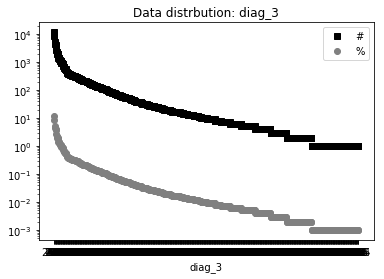

In [162]:
n_total= max(1,df['diag_3'].count())
n_count=df['diag_3'].value_counts()
Prt_count=100*n_count/n_total
plt.semilogy(n_count,marker='s',color='black',linestyle='none',label='#')
plt.semilogy(Prt_count,marker='o',color='gray',linestyle='none',label='%')
plt.xlabel('diag_3')
plt.legend(loc='upper right')
plt.title('Data distrbution: diag_3')

(0, 1)

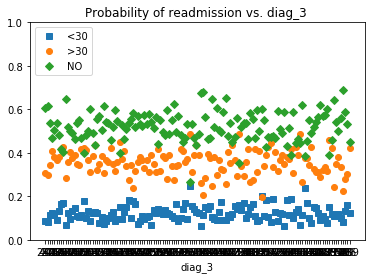

In [94]:
i_char=np.array(df['diag_3'].value_counts().keys().tolist())
L=len(i_char)
Lj=len(j_readim)

x_char = np.array([])
y_char = np.array([])


i = 0

while i < L:
    n = max(1,df['readmitted'][df['diag_3'] == i_char[i]].count())
    
    if n > 100:
        x_char = np.append(x_char,i_char[i])
        j=0
        while j < Lj:
            x = df['readmitted'][df['diag_3']== i_char[i]][df['readmitted'] == j_readim[j]].count()/n                
            y_char = np.append(y_char,x)
            j+=1
    i+=1
                                  
L1=len(x_char)    
y_char=np.resize(y_char,(L1,Lj))

plt.plot(x_char,y_char[:,0],label='<30',marker=mark[0],linestyle='none') 
plt.plot(x_char,y_char[:,1],label='>30',marker=mark[1],linestyle='none') 
plt.plot(x_char,y_char[:,2],label='NO',marker=mark[2],linestyle='none') 
plt.title('Probability of readmission vs. diag_3 ')
plt.xlabel('diag_3')
plt.legend(loc='upper left')
plt.ylim(0, 1)

Text(0.5,1,'Data distrbution: A1Cresult')

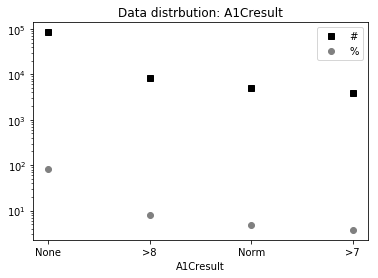

In [163]:
n_total= max(1,df['A1Cresult'].count())
n_count=df['A1Cresult'].value_counts()
Prt_count=100*n_count/n_total
plt.semilogy(n_count,marker='s',color='black',linestyle='none',label='#')
plt.semilogy(Prt_count,marker='o',color='gray',linestyle='none',label='%')
plt.xlabel('A1Cresult')
plt.legend(loc='upper right')
plt.title('Data distrbution: A1Cresult')

(0, 1)

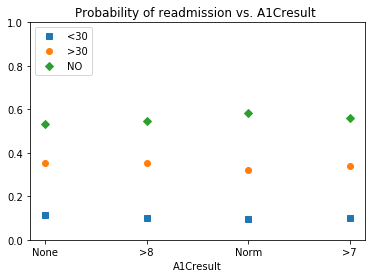

In [97]:
i_char=np.array(df['A1Cresult'].value_counts().keys().tolist())
L=len(i_char)
Lj=len(j_readim)

x_char = np.array([])
y_char = np.array([])


i = 0

while i < L:
    n = max(1,df['readmitted'][df['A1Cresult'] == i_char[i]].count())
    
    if n > 100:
        x_char = np.append(x_char,i_char[i])
        j=0
        while j < Lj:
            x = df['readmitted'][df['A1Cresult']== i_char[i]][df['readmitted'] == j_readim[j]].count()/n                
            y_char = np.append(y_char,x)
            j+=1
    i+=1
                                  
L1=len(x_char)    
y_char=np.resize(y_char,(L1,Lj))

plt.plot(x_char,y_char[:,0],label='<30',marker=mark[0],linestyle='none') 
plt.plot(x_char,y_char[:,1],label='>30',marker=mark[1],linestyle='none') 
plt.plot(x_char,y_char[:,2],label='NO',marker=mark[2],linestyle='none') 
plt.title('Probability of readmission vs. A1Cresult ')
plt.xlabel('A1Cresult')
plt.legend(loc='upper left')
plt.ylim(0, 1)

Text(0.5,1,'Data distrbution: metformin')

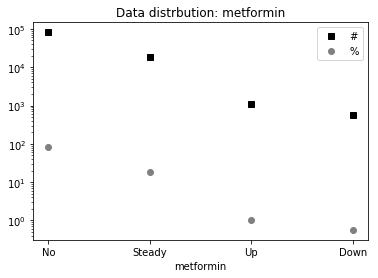

In [164]:
n_total= max(1,df['metformin'].count())
n_count=df['metformin'].value_counts()
Prt_count=100*n_count/n_total
plt.semilogy(n_count,marker='s',color='black',linestyle='none',label='#')
plt.semilogy(Prt_count,marker='o',color='gray',linestyle='none',label='%')
plt.xlabel('metformin')
plt.legend(loc='upper right')
plt.title('Data distrbution: metformin')

(0, 1)

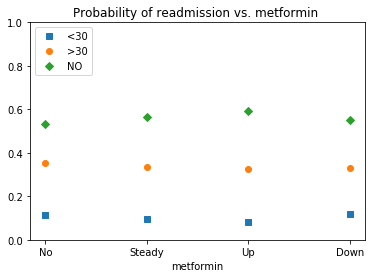

In [100]:
i_char=np.array(df['metformin'].value_counts().keys().tolist())
L=len(i_char)
Lj=len(j_readim)

x_char = np.array([])
y_char = np.array([])


i = 0

while i < L:
    n = max(1,df['readmitted'][df['metformin'] == i_char[i]].count())
    
    if n > 100:
        x_char = np.append(x_char,i_char[i])
        j=0
        while j < Lj:
            x = df['readmitted'][df['metformin']== i_char[i]][df['readmitted'] == j_readim[j]].count()/n                
            y_char = np.append(y_char,x)
            j+=1
    i+=1
                                  
L1=len(x_char)    
y_char=np.resize(y_char,(L1,Lj))

plt.plot(x_char,y_char[:,0],label='<30',marker=mark[0],linestyle='none') 
plt.plot(x_char,y_char[:,1],label='>30',marker=mark[1],linestyle='none') 
plt.plot(x_char,y_char[:,2],label='NO',marker=mark[2],linestyle='none') 
plt.title('Probability of readmission vs. metformin ')
plt.xlabel('metformin')
plt.legend(loc='upper left')
plt.ylim(0, 1)

Text(0.5,1,'Data distrbution: repaglinide')

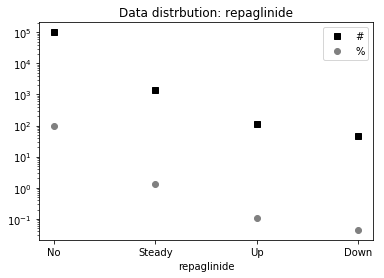

In [165]:
n_total= max(1,df['repaglinide'].count())
n_count=df['repaglinide'].value_counts()
Prt_count=100*n_count/n_total
plt.semilogy(n_count,marker='s',color='black',linestyle='none',label='#')
plt.semilogy(Prt_count,marker='o',color='gray',linestyle='none',label='%')
plt.xlabel('repaglinide')
plt.legend(loc='upper right')
plt.title('Data distrbution: repaglinide')

(0, 1)

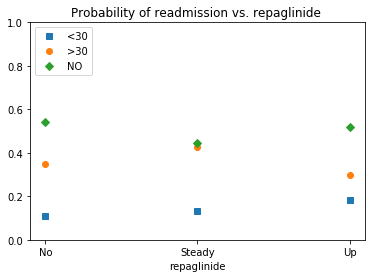

In [102]:
i_char=np.array(df['repaglinide'].value_counts().keys().tolist())
L=len(i_char)
Lj=len(j_readim)

x_char = np.array([])
y_char = np.array([])


i = 0

while i < L:
    n = max(1,df['readmitted'][df['repaglinide'] == i_char[i]].count())
    
    if n > 100:
        x_char = np.append(x_char,i_char[i])
        j=0
        while j < Lj:
            x = df['readmitted'][df['repaglinide']== i_char[i]][df['readmitted'] == j_readim[j]].count()/n                
            y_char = np.append(y_char,x)
            j+=1
    i+=1
                                  
L1=len(x_char)    
y_char=np.resize(y_char,(L1,Lj))

plt.plot(x_char,y_char[:,0],label='<30',marker=mark[0],linestyle='none') 
plt.plot(x_char,y_char[:,1],label='>30',marker=mark[1],linestyle='none') 
plt.plot(x_char,y_char[:,2],label='NO',marker=mark[2],linestyle='none') 
plt.title('Probability of readmission vs. repaglinide ')
plt.xlabel('repaglinide')
plt.legend(loc='upper left')
plt.ylim(0, 1)

Text(0.5,1,'Data distrbution: nateglinide')

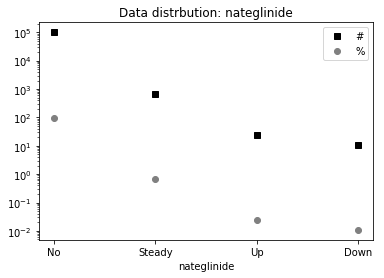

In [170]:
n_total= max(1,df['nateglinide'].count())
n_count=df['nateglinide'].value_counts()
Prt_count=100*n_count/n_total
plt.semilogy(n_count,marker='s',color='black',linestyle='none',label='#')
plt.semilogy(Prt_count,marker='o',color='gray',linestyle='none',label='%')
plt.xlabel('nateglinide')
plt.legend(loc='upper right')
plt.title('Data distrbution: nateglinide')

(0, 1)

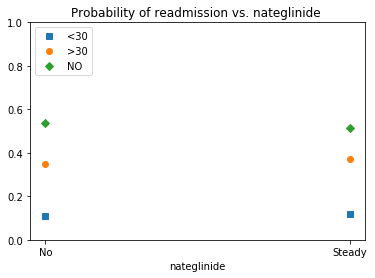

In [104]:
i_char=np.array(df['nateglinide'].value_counts().keys().tolist())
L=len(i_char)
Lj=len(j_readim)

x_char = np.array([])
y_char = np.array([])


i = 0

while i < L:
    n = max(1,df['readmitted'][df['nateglinide'] == i_char[i]].count())
    
    if n > 100:
        x_char = np.append(x_char,i_char[i])
        j=0
        while j < Lj:
            x = df['readmitted'][df['nateglinide']== i_char[i]][df['readmitted'] == j_readim[j]].count()/n                
            y_char = np.append(y_char,x)
            j+=1
    i+=1
                                  
L1=len(x_char)    
y_char=np.resize(y_char,(L1,Lj))

plt.plot(x_char,y_char[:,0],label='<30',marker=mark[0],linestyle='none') 
plt.plot(x_char,y_char[:,1],label='>30',marker=mark[1],linestyle='none') 
plt.plot(x_char,y_char[:,2],label='NO',marker=mark[2],linestyle='none') 
plt.title('Probability of readmission vs. nateglinide ')
plt.xlabel('nateglinide')
plt.legend(loc='upper left')
plt.ylim(0, 1)

Text(0.5,1,'Data distrbution: chlorpropamide')

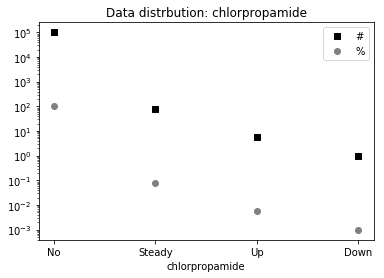

In [169]:
n_total= max(1,df['chlorpropamide'].count())
n_count=df['chlorpropamide'].value_counts()
Prt_count=100*n_count/n_total
plt.semilogy(n_count,marker='s',color='black',linestyle='none',label='#')
plt.semilogy(Prt_count,marker='o',color='gray',linestyle='none',label='%')
plt.xlabel('chlorpropamide')
plt.legend(loc='upper right')
plt.title('Data distrbution: chlorpropamide')

(0, 1)

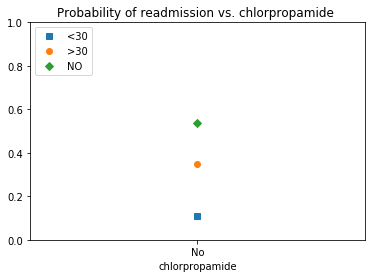

In [106]:
i_char=np.array(df['chlorpropamide'].value_counts().keys().tolist())
L=len(i_char)
Lj=len(j_readim)

x_char = np.array([])
y_char = np.array([])


i = 0

while i < L:
    n = max(1,df['readmitted'][df['chlorpropamide'] == i_char[i]].count())
    
    if n > 100:
        x_char = np.append(x_char,i_char[i])
        j=0
        while j < Lj:
            x = df['readmitted'][df['chlorpropamide']== i_char[i]][df['readmitted'] == j_readim[j]].count()/n                
            y_char = np.append(y_char,x)
            j+=1
    i+=1
                                  
L1=len(x_char)    
y_char=np.resize(y_char,(L1,Lj))

plt.plot(x_char,y_char[:,0],label='<30',marker=mark[0],linestyle='none') 
plt.plot(x_char,y_char[:,1],label='>30',marker=mark[1],linestyle='none') 
plt.plot(x_char,y_char[:,2],label='NO',marker=mark[2],linestyle='none') 
plt.title('Probability of readmission vs. chlorpropamide ')
plt.xlabel('chlorpropamide')
plt.legend(loc='upper left')
plt.ylim(0, 1)

Text(0.5,1,'Data distrbution: glimepiride')

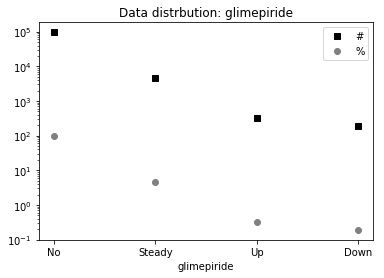

In [168]:
n_total= max(1,df['glimepiride'].count())
n_count=df['glimepiride'].value_counts()
Prt_count=100*n_count/n_total
plt.semilogy(n_count,marker='s',color='black',linestyle='none',label='#')
plt.semilogy(Prt_count,marker='o',color='gray',linestyle='none',label='%')
plt.xlabel('glimepiride')
plt.legend(loc='upper right')
plt.title('Data distrbution: glimepiride')

(0, 1)

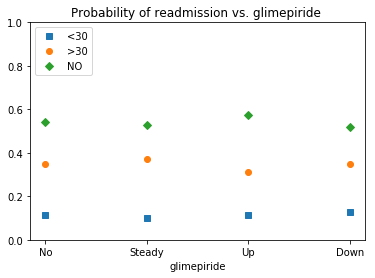

In [108]:
i_char=np.array(df['glimepiride'].value_counts().keys().tolist())
L=len(i_char)
Lj=len(j_readim)

x_char = np.array([])
y_char = np.array([])


i = 0

while i < L:
    n = max(1,df['readmitted'][df['glimepiride'] == i_char[i]].count())
    
    if n > 100:
        x_char = np.append(x_char,i_char[i])
        j=0
        while j < Lj:
            x = df['readmitted'][df['glimepiride']== i_char[i]][df['readmitted'] == j_readim[j]].count()/n                
            y_char = np.append(y_char,x)
            j+=1
    i+=1
                                  
L1=len(x_char)    
y_char=np.resize(y_char,(L1,Lj))

plt.plot(x_char,y_char[:,0],label='<30',marker=mark[0],linestyle='none') 
plt.plot(x_char,y_char[:,1],label='>30',marker=mark[1],linestyle='none') 
plt.plot(x_char,y_char[:,2],label='NO',marker=mark[2],linestyle='none') 
plt.title('Probability of readmission vs. glimepiride ')
plt.xlabel('glimepiride')
plt.legend(loc='upper left')
plt.ylim(0, 1)

Text(0.5,1,'Data distrbution: acetohexamide')

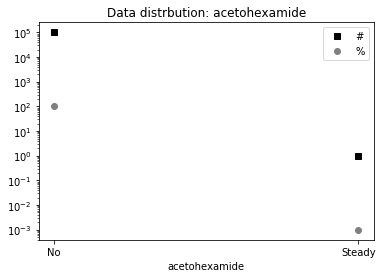

In [167]:
n_total= max(1,df['acetohexamide'].count())
n_count=df['acetohexamide'].value_counts()
Prt_count=100*n_count/n_total
plt.semilogy(n_count,marker='s',color='black',linestyle='none',label='#')
plt.semilogy(Prt_count,marker='o',color='gray',linestyle='none',label='%')
plt.xlabel('acetohexamide')
plt.legend(loc='upper right')
plt.title('Data distrbution: acetohexamide')

(0, 1)

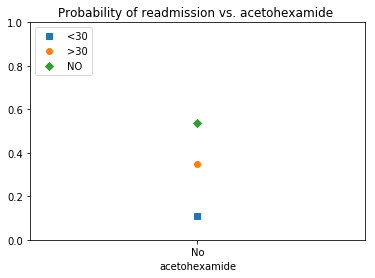

In [110]:
i_char=np.array(df['acetohexamide'].value_counts().keys().tolist())
L=len(i_char)
Lj=len(j_readim)

x_char = np.array([])
y_char = np.array([])


i = 0

while i < L:
    n = max(1,df['readmitted'][df['acetohexamide'] == i_char[i]].count())
    
    if n > 100:
        x_char = np.append(x_char,i_char[i])
        j=0
        while j < Lj:
            x = df['readmitted'][df['acetohexamide']== i_char[i]][df['readmitted'] == j_readim[j]].count()/n                
            y_char = np.append(y_char,x)
            j+=1
    i+=1
                                  
L1=len(x_char)    
y_char=np.resize(y_char,(L1,Lj))

plt.plot(x_char,y_char[:,0],label='<30',marker=mark[0],linestyle='none') 
plt.plot(x_char,y_char[:,1],label='>30',marker=mark[1],linestyle='none') 
plt.plot(x_char,y_char[:,2],label='NO',marker=mark[2],linestyle='none') 
plt.title('Probability of readmission vs. acetohexamide ')
plt.xlabel('acetohexamide')
plt.legend(loc='upper left')
plt.ylim(0, 1)

Text(0.5,1,'Data distrbution: glipizide')

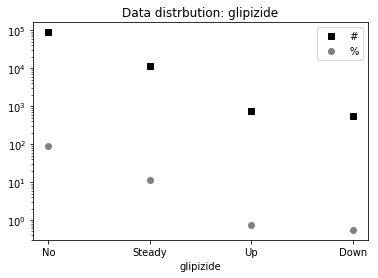

In [166]:
n_total= max(1,df['glipizide'].count())
n_count=df['glipizide'].value_counts()
Prt_count=100*n_count/n_total
plt.semilogy(n_count,marker='s',color='black',linestyle='none',label='#')
plt.semilogy(Prt_count,marker='o',color='gray',linestyle='none',label='%')
plt.xlabel('glipizide')
plt.legend(loc='upper right')
plt.title('Data distrbution: glipizide')

(0, 1)

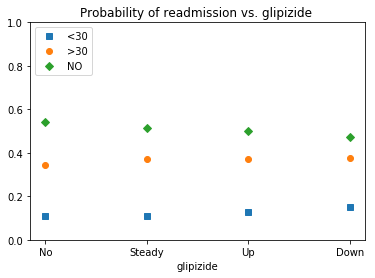

In [112]:
i_char=np.array(df['glipizide'].value_counts().keys().tolist())
L=len(i_char)
Lj=len(j_readim)

x_char = np.array([])
y_char = np.array([])


i = 0

while i < L:
    n = max(1,df['readmitted'][df['glipizide'] == i_char[i]].count())
    
    if n > 100:
        x_char = np.append(x_char,i_char[i])
        j=0
        while j < Lj:
            x = df['readmitted'][df['glipizide']== i_char[i]][df['readmitted'] == j_readim[j]].count()/n                
            y_char = np.append(y_char,x)
            j+=1
    i+=1
                                  
L1=len(x_char)    
y_char=np.resize(y_char,(L1,Lj))

plt.plot(x_char,y_char[:,0],label='<30',marker=mark[0],linestyle='none') 
plt.plot(x_char,y_char[:,1],label='>30',marker=mark[1],linestyle='none') 
plt.plot(x_char,y_char[:,2],label='NO',marker=mark[2],linestyle='none') 
plt.title('Probability of readmission vs. glipizide ')
plt.xlabel('glipizide')
plt.legend(loc='upper left')
plt.ylim(0, 1)

Text(0.5,1,'Data distrbution: glyburide')

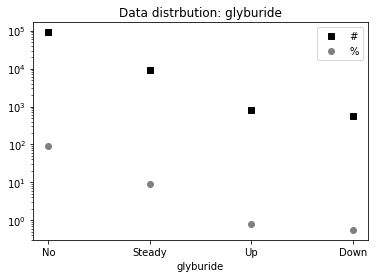

In [123]:
n_total= max(1,df['glyburide'].count())
n_count=df['glyburide'].value_counts()
Prt_count=100*n_count/n_total
plt.semilogy(n_count,marker='s',color='black',linestyle='none',label='#')
plt.semilogy(Prt_count,marker='o',color='gray',linestyle='none',label='%')
plt.xlabel('glyburide')
plt.legend(loc='upper right')
plt.title('Data distrbution: glyburide')

(0, 1)

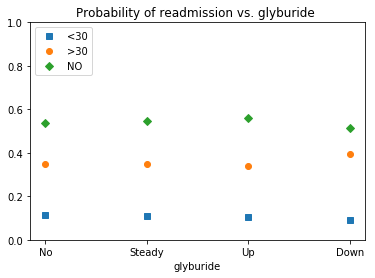

In [113]:
i_char=np.array(df['glyburide'].value_counts().keys().tolist())
L=len(i_char)
Lj=len(j_readim)

x_char = np.array([])
y_char = np.array([])


i = 0

while i < L:
    n = max(1,df['readmitted'][df['glyburide'] == i_char[i]].count())
    
    if n > 100:
        x_char = np.append(x_char,i_char[i])
        j=0
        while j < Lj:
            x = df['readmitted'][df['glyburide']== i_char[i]][df['readmitted'] == j_readim[j]].count()/n                
            y_char = np.append(y_char,x)
            j+=1
    i+=1
                                  
L1=len(x_char)    
y_char=np.resize(y_char,(L1,Lj))

plt.plot(x_char,y_char[:,0],label='<30',marker=mark[0],linestyle='none') 
plt.plot(x_char,y_char[:,1],label='>30',marker=mark[1],linestyle='none') 
plt.plot(x_char,y_char[:,2],label='NO',marker=mark[2],linestyle='none') 
plt.title('Probability of readmission vs. glyburide ')
plt.xlabel('glyburide')
plt.legend(loc='upper left')
plt.ylim(0, 1)

Text(0.5,1,'Data distrbution: glyburide')

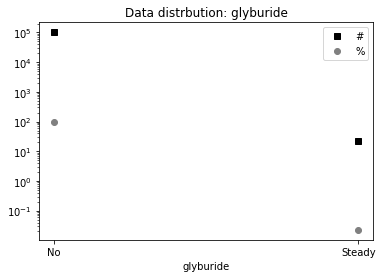

In [125]:
n_total= max(1,df['tolbutamide'].count())
n_count=df['tolbutamide'].value_counts()
Prt_count=100*n_count/n_total
plt.semilogy(n_count,marker='s',color='black',linestyle='none',label='#')
plt.semilogy(Prt_count,marker='o',color='gray',linestyle='none',label='%')
plt.xlabel('glyburide')
plt.legend(loc='upper right')
plt.title('Data distrbution: glyburide')

(0, 1)

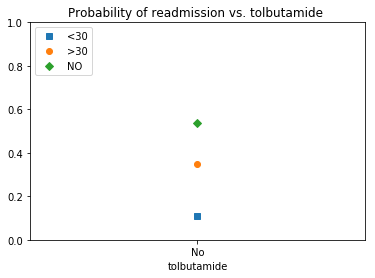

In [124]:
i_char=np.array(df['tolbutamide'].value_counts().keys().tolist())
L=len(i_char)
Lj=len(j_readim)

x_char = np.array([])
y_char = np.array([])


i = 0

while i < L:
    n = max(1,df['readmitted'][df['tolbutamide'] == i_char[i]].count())
    
    if n > 100:
        x_char = np.append(x_char,i_char[i])
        j=0
        while j < Lj:
            x = df['readmitted'][df['tolbutamide']== i_char[i]][df['readmitted'] == j_readim[j]].count()/n                
            y_char = np.append(y_char,x)
            j+=1
    i+=1
                                  
L1=len(x_char)    
y_char=np.resize(y_char,(L1,Lj))

plt.plot(x_char,y_char[:,0],label='<30',marker=mark[0],linestyle='none') 
plt.plot(x_char,y_char[:,1],label='>30',marker=mark[1],linestyle='none') 
plt.plot(x_char,y_char[:,2],label='NO',marker=mark[2],linestyle='none') 
plt.title('Probability of readmission vs. tolbutamide ')
plt.xlabel('tolbutamide')
plt.legend(loc='upper left')
plt.ylim(0, 1)

Text(0.5,1,'Data distrbution: glyburide')

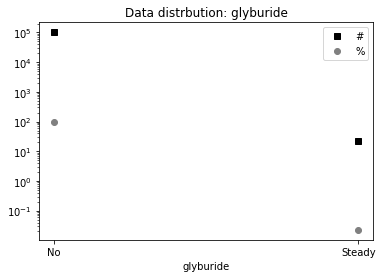

In [125]:
n_total= max(1,df['tolbutamide'].count())
n_count=df['tolbutamide'].value_counts()
Prt_count=100*n_count/n_total
plt.semilogy(n_count,marker='s',color='black',linestyle='none',label='#')
plt.semilogy(Prt_count,marker='o',color='gray',linestyle='none',label='%')
plt.xlabel('glyburide')
plt.legend(loc='upper right')
plt.title('Data distrbution: glyburide')

(0, 1)

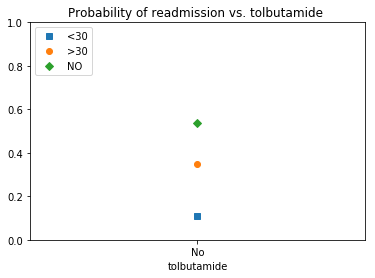

In [124]:
i_char=np.array(df['tolbutamide'].value_counts().keys().tolist())
L=len(i_char)
Lj=len(j_readim)

x_char = np.array([])
y_char = np.array([])


i = 0

while i < L:
    n = max(1,df['readmitted'][df['tolbutamide'] == i_char[i]].count())
    
    if n > 100:
        x_char = np.append(x_char,i_char[i])
        j=0
        while j < Lj:
            x = df['readmitted'][df['tolbutamide']== i_char[i]][df['readmitted'] == j_readim[j]].count()/n                
            y_char = np.append(y_char,x)
            j+=1
    i+=1
                                  
L1=len(x_char)    
y_char=np.resize(y_char,(L1,Lj))

plt.plot(x_char,y_char[:,0],label='<30',marker=mark[0],linestyle='none') 
plt.plot(x_char,y_char[:,1],label='>30',marker=mark[1],linestyle='none') 
plt.plot(x_char,y_char[:,2],label='NO',marker=mark[2],linestyle='none') 
plt.title('Probability of readmission vs. tolbutamide ')
plt.xlabel('tolbutamide')
plt.legend(loc='upper left')
plt.ylim(0, 1)

Text(0.5,1,'Data distrbution: rosiglitazone')

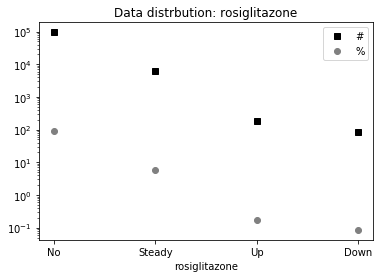

In [127]:
n_total= max(1,df['rosiglitazone'].count())
n_count=df['rosiglitazone'].value_counts()
Prt_count=100*n_count/n_total
plt.semilogy(n_count,marker='s',color='black',linestyle='none',label='#')
plt.semilogy(Prt_count,marker='o',color='gray',linestyle='none',label='%')
plt.xlabel('rosiglitazone')
plt.legend(loc='upper right')
plt.title('Data distrbution: rosiglitazone')

(0, 1)

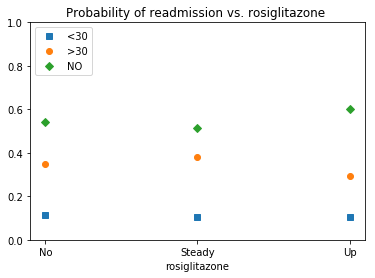

In [126]:
i_char=np.array(df['rosiglitazone'].value_counts().keys().tolist())
L=len(i_char)
Lj=len(j_readim)

x_char = np.array([])
y_char = np.array([])


i = 0

while i < L:
    n = max(1,df['readmitted'][df['rosiglitazone'] == i_char[i]].count())
    
    if n > 100:
        x_char = np.append(x_char,i_char[i])
        j=0
        while j < Lj:
            x = df['readmitted'][df['rosiglitazone']== i_char[i]][df['readmitted'] == j_readim[j]].count()/n                
            y_char = np.append(y_char,x)
            j+=1
    i+=1
                                  
L1=len(x_char)    
y_char=np.resize(y_char,(L1,Lj))

plt.plot(x_char,y_char[:,0],label='<30',marker=mark[0],linestyle='none') 
plt.plot(x_char,y_char[:,1],label='>30',marker=mark[1],linestyle='none') 
plt.plot(x_char,y_char[:,2],label='NO',marker=mark[2],linestyle='none') 
plt.title('Probability of readmission vs. rosiglitazone ')
plt.xlabel('rosiglitazone')
plt.legend(loc='upper left')
plt.ylim(0, 1)

Text(0.5,1,'Data distrbution: acarbose')

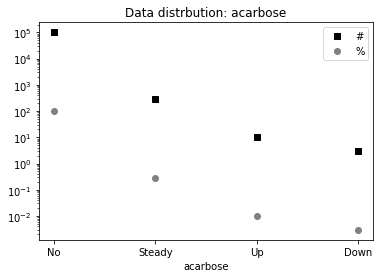

In [129]:
n_total= max(1,df['acarbose'].count())
n_count=df['acarbose'].value_counts()
Prt_count=100*n_count/n_total
plt.semilogy(n_count,marker='s',color='black',linestyle='none',label='#')
plt.semilogy(Prt_count,marker='o',color='gray',linestyle='none',label='%')
plt.xlabel('acarbose')
plt.legend(loc='upper right')
plt.title('Data distrbution: acarbose')

(0, 1)

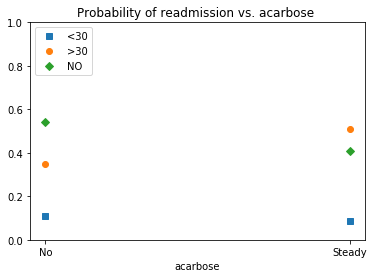

In [128]:
i_char=np.array(df['acarbose'].value_counts().keys().tolist())
L=len(i_char)
Lj=len(j_readim)

x_char = np.array([])
y_char = np.array([])


i = 0

while i < L:
    n = max(1,df['readmitted'][df['acarbose'] == i_char[i]].count())
    
    if n > 100:
        x_char = np.append(x_char,i_char[i])
        j=0
        while j < Lj:
            x = df['readmitted'][df['acarbose']== i_char[i]][df['readmitted'] == j_readim[j]].count()/n                
            y_char = np.append(y_char,x)
            j+=1
    i+=1
                                  
L1=len(x_char)    
y_char=np.resize(y_char,(L1,Lj))

plt.plot(x_char,y_char[:,0],label='<30',marker=mark[0],linestyle='none') 
plt.plot(x_char,y_char[:,1],label='>30',marker=mark[1],linestyle='none') 
plt.plot(x_char,y_char[:,2],label='NO',marker=mark[2],linestyle='none') 
plt.title('Probability of readmission vs. acarbose ')
plt.xlabel('acarbose')
plt.legend(loc='upper left')
plt.ylim(0, 1)

Text(0.5,1,'Data distrbution: miglitol')

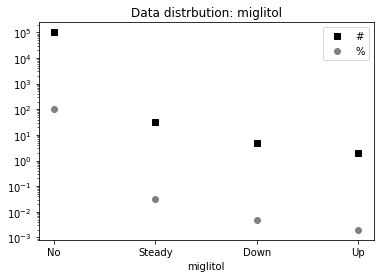

In [130]:
n_total= max(1,df['miglitol'].count())
n_count=df['miglitol'].value_counts()
Prt_count=100*n_count/n_total
plt.semilogy(n_count,marker='s',color='black',linestyle='none',label='#')
plt.semilogy(Prt_count,marker='o',color='gray',linestyle='none',label='%')
plt.xlabel('miglitol')
plt.legend(loc='upper right')
plt.title('Data distrbution: miglitol')

(0, 1)

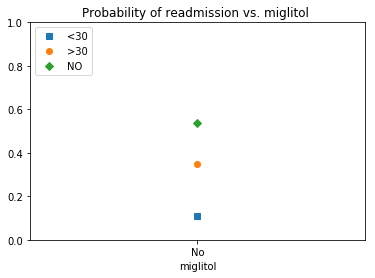

In [131]:
i_char=np.array(df['miglitol'].value_counts().keys().tolist())
L=len(i_char)
Lj=len(j_readim)

x_char = np.array([])
y_char = np.array([])


i = 0

while i < L:
    n = max(1,df['readmitted'][df['miglitol'] == i_char[i]].count())
    
    if n > 100:
        x_char = np.append(x_char,i_char[i])
        j=0
        while j < Lj:
            x = df['readmitted'][df['miglitol']== i_char[i]][df['readmitted'] == j_readim[j]].count()/n                
            y_char = np.append(y_char,x)
            j+=1
    i+=1
                                  
L1=len(x_char)    
y_char=np.resize(y_char,(L1,Lj))

plt.plot(x_char,y_char[:,0],label='<30',marker=mark[0],linestyle='none') 
plt.plot(x_char,y_char[:,1],label='>30',marker=mark[1],linestyle='none') 
plt.plot(x_char,y_char[:,2],label='NO',marker=mark[2],linestyle='none') 
plt.title('Probability of readmission vs. miglitol ')
plt.xlabel('miglitol')
plt.legend(loc='upper left')
plt.ylim(0, 1)

Text(0.5,1,'Data distrbution: troglitazone')

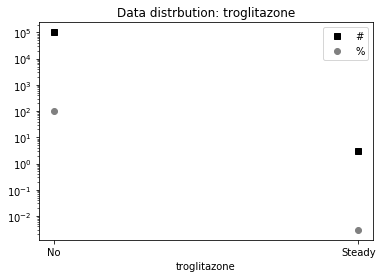

In [132]:
n_total= max(1,df['troglitazone'].count())
n_count=df['troglitazone'].value_counts()
Prt_count=100*n_count/n_total
plt.semilogy(n_count,marker='s',color='black',linestyle='none',label='#')
plt.semilogy(Prt_count,marker='o',color='gray',linestyle='none',label='%')
plt.xlabel('troglitazone')
plt.legend(loc='upper right')
plt.title('Data distrbution: troglitazone')

(0, 1)

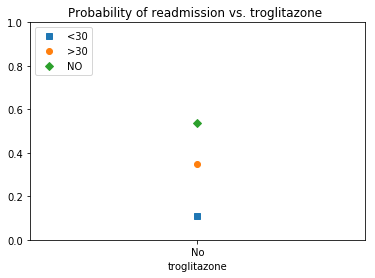

In [133]:
i_char=np.array(df['troglitazone'].value_counts().keys().tolist())
L=len(i_char)
Lj=len(j_readim)

x_char = np.array([])
y_char = np.array([])


i = 0

while i < L:
    n = max(1,df['readmitted'][df['troglitazone'] == i_char[i]].count())
    
    if n > 100:
        x_char = np.append(x_char,i_char[i])
        j=0
        while j < Lj:
            x = df['readmitted'][df['troglitazone']== i_char[i]][df['readmitted'] == j_readim[j]].count()/n                
            y_char = np.append(y_char,x)
            j+=1
    i+=1
                                  
L1=len(x_char)    
y_char=np.resize(y_char,(L1,Lj))

plt.plot(x_char,y_char[:,0],label='<30',marker=mark[0],linestyle='none') 
plt.plot(x_char,y_char[:,1],label='>30',marker=mark[1],linestyle='none') 
plt.plot(x_char,y_char[:,2],label='NO',marker=mark[2],linestyle='none') 
plt.title('Probability of readmission vs. troglitazone ')
plt.xlabel('troglitazone')
plt.legend(loc='upper left')
plt.ylim(0, 1)

Text(0.5,1,'Data distrbution: tolazamide')

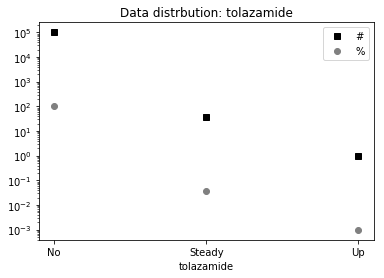

In [134]:
n_total= max(1,df['tolazamide'].count())
n_count=df['tolazamide'].value_counts()
Prt_count=100*n_count/n_total
plt.semilogy(n_count,marker='s',color='black',linestyle='none',label='#')
plt.semilogy(Prt_count,marker='o',color='gray',linestyle='none',label='%')
plt.xlabel('tolazamide')
plt.legend(loc='upper right')
plt.title('Data distrbution: tolazamide')

(0, 1)

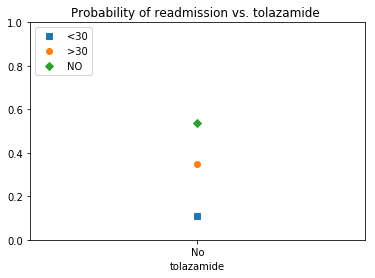

In [135]:
i_char=np.array(df['tolazamide'].value_counts().keys().tolist())
L=len(i_char)
Lj=len(j_readim)

x_char = np.array([])
y_char = np.array([])


i = 0

while i < L:
    n = max(1,df['readmitted'][df['tolazamide'] == i_char[i]].count())
    
    if n > 100:
        x_char = np.append(x_char,i_char[i])
        j=0
        while j < Lj:
            x = df['readmitted'][df['tolazamide']== i_char[i]][df['readmitted'] == j_readim[j]].count()/n                
            y_char = np.append(y_char,x)
            j+=1
    i+=1
                                  
L1=len(x_char)    
y_char=np.resize(y_char,(L1,Lj))

plt.plot(x_char,y_char[:,0],label='<30',marker=mark[0],linestyle='none') 
plt.plot(x_char,y_char[:,1],label='>30',marker=mark[1],linestyle='none') 
plt.plot(x_char,y_char[:,2],label='NO',marker=mark[2],linestyle='none') 
plt.title('Probability of readmission vs. tolazamide ')
plt.xlabel('tolazamide')
plt.legend(loc='upper left')
plt.ylim(0, 1)

Text(0.5,1,'Data distrbution: troglitazone')

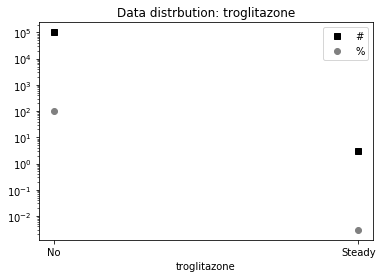

In [132]:
n_total= max(1,df['troglitazone'].count())
n_count=df['troglitazone'].value_counts()
Prt_count=100*n_count/n_total
plt.semilogy(n_count,marker='s',color='black',linestyle='none',label='#')
plt.semilogy(Prt_count,marker='o',color='gray',linestyle='none',label='%')
plt.xlabel('troglitazone')
plt.legend(loc='upper right')
plt.title('Data distrbution: troglitazone')

Text(0.5,1,'Data distrbution: examide')

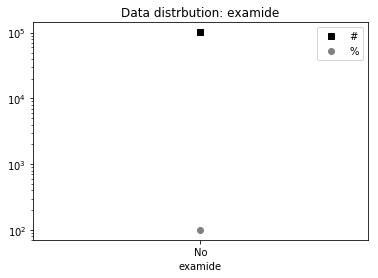

In [136]:
n_total= max(1,df['examide'].count())
n_count=df['examide'].value_counts()
Prt_count=100*n_count/n_total
plt.semilogy(n_count,marker='s',color='black',linestyle='none',label='#')
plt.semilogy(Prt_count,marker='o',color='gray',linestyle='none',label='%')
plt.xlabel('examide')
plt.legend(loc='upper right')
plt.title('Data distrbution: examide')

(0, 1)

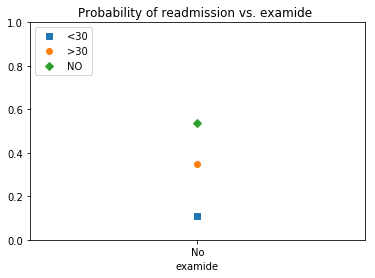

In [137]:
i_char=np.array(df['examide'].value_counts().keys().tolist())
L=len(i_char)
Lj=len(j_readim)

x_char = np.array([])
y_char = np.array([])


i = 0

while i < L:
    n = max(1,df['readmitted'][df['examide'] == i_char[i]].count())
    
    if n > 100:
        x_char = np.append(x_char,i_char[i])
        j=0
        while j < Lj:
            x = df['readmitted'][df['examide']== i_char[i]][df['readmitted'] == j_readim[j]].count()/n                
            y_char = np.append(y_char,x)
            j+=1
    i+=1
                                  
L1=len(x_char)    
y_char=np.resize(y_char,(L1,Lj))

plt.plot(x_char,y_char[:,0],label='<30',marker=mark[0],linestyle='none') 
plt.plot(x_char,y_char[:,1],label='>30',marker=mark[1],linestyle='none') 
plt.plot(x_char,y_char[:,2],label='NO',marker=mark[2],linestyle='none') 
plt.title('Probability of readmission vs. examide ')
plt.xlabel('examide')
plt.legend(loc='upper left')
plt.ylim(0, 1)

Text(0.5,1,'Data distrbution: citoglipton')

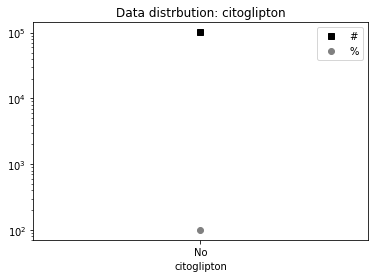

In [138]:
n_total= max(1,df['citoglipton'].count())
n_count=df['citoglipton'].value_counts()
Prt_count=100*n_count/n_total
plt.semilogy(n_count,marker='s',color='black',linestyle='none',label='#')
plt.semilogy(Prt_count,marker='o',color='gray',linestyle='none',label='%')
plt.xlabel('citoglipton')
plt.legend(loc='upper right')
plt.title('Data distrbution: citoglipton')

(0, 1)

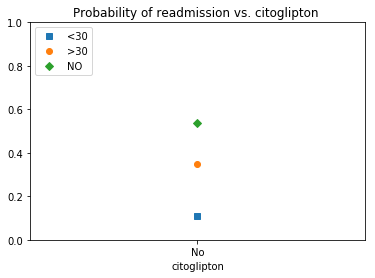

In [139]:
i_char=np.array(df['citoglipton'].value_counts().keys().tolist())
L=len(i_char)
Lj=len(j_readim)

x_char = np.array([])
y_char = np.array([])


i = 0

while i < L:
    n = max(1,df['readmitted'][df['citoglipton'] == i_char[i]].count())
    
    if n > 100:
        x_char = np.append(x_char,i_char[i])
        j=0
        while j < Lj:
            x = df['readmitted'][df['citoglipton']== i_char[i]][df['readmitted'] == j_readim[j]].count()/n                
            y_char = np.append(y_char,x)
            j+=1
    i+=1
                                  
L1=len(x_char)    
y_char=np.resize(y_char,(L1,Lj))

plt.plot(x_char,y_char[:,0],label='<30',marker=mark[0],linestyle='none') 
plt.plot(x_char,y_char[:,1],label='>30',marker=mark[1],linestyle='none') 
plt.plot(x_char,y_char[:,2],label='NO',marker=mark[2],linestyle='none') 
plt.title('Probability of readmission vs. citoglipton ')
plt.xlabel('citoglipton')
plt.legend(loc='upper left')
plt.ylim(0, 1)

Text(0.5,1,'Data distrbution: insulin')

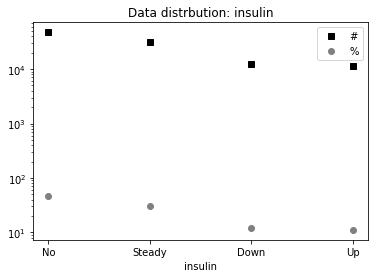

In [140]:
n_total= max(1,df['insulin'].count())
n_count=df['insulin'].value_counts()
Prt_count=100*n_count/n_total
plt.semilogy(n_count,marker='s',color='black',linestyle='none',label='#')
plt.semilogy(Prt_count,marker='o',color='gray',linestyle='none',label='%')
plt.xlabel('insulin')
plt.legend(loc='upper right')
plt.title('Data distrbution: insulin')

(0, 1)

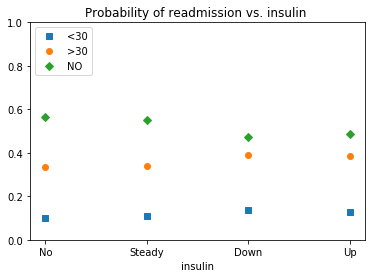

In [141]:
i_char=np.array(df['insulin'].value_counts().keys().tolist())
L=len(i_char)
Lj=len(j_readim)

x_char = np.array([])
y_char = np.array([])


i = 0

while i < L:
    n = max(1,df['readmitted'][df['insulin'] == i_char[i]].count())
    
    if n > 100:
        x_char = np.append(x_char,i_char[i])
        j=0
        while j < Lj:
            x = df['readmitted'][df['insulin']== i_char[i]][df['readmitted'] == j_readim[j]].count()/n                
            y_char = np.append(y_char,x)
            j+=1
    i+=1
                                  
L1=len(x_char)    
y_char=np.resize(y_char,(L1,Lj))

plt.plot(x_char,y_char[:,0],label='<30',marker=mark[0],linestyle='none') 
plt.plot(x_char,y_char[:,1],label='>30',marker=mark[1],linestyle='none') 
plt.plot(x_char,y_char[:,2],label='NO',marker=mark[2],linestyle='none') 
plt.title('Probability of readmission vs. insulin ')
plt.xlabel('insulin')
plt.legend(loc='upper left')
plt.ylim(0, 1)

Text(0.5,1,'Data distrbution: glyburide-metformin')

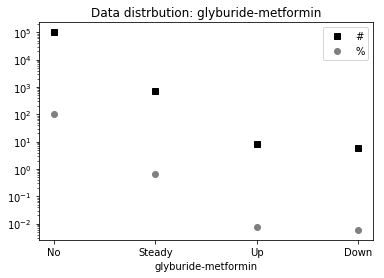

In [142]:
n_total= max(1,df['glyburide-metformin'].count())
n_count=df['glyburide-metformin'].value_counts()
Prt_count=100*n_count/n_total
plt.semilogy(n_count,marker='s',color='black',linestyle='none',label='#')
plt.semilogy(Prt_count,marker='o',color='gray',linestyle='none',label='%')
plt.xlabel('glyburide-metformin')
plt.legend(loc='upper right')
plt.title('Data distrbution: glyburide-metformin')

(0, 1)

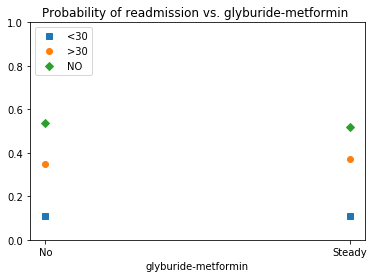

In [143]:
i_char=np.array(df['glyburide-metformin'].value_counts().keys().tolist())
L=len(i_char)
Lj=len(j_readim)
n_total= max(1,df['glyburide-metformin'].count())
n_count=df['glyburide-metformin'].value_counts()
Prt_count=100*n_count/n_total
plt.semilogy(n_count,marker='s',color='black',linestyle='none',label='#')
plt.semilogy(Prt_count,marker='o',color='gray',linestyle='none',label='%')
plt.xlabel('glyburide-metformin')
plt.legend(loc='upper right')
plt.title('Data distrbution: glyburide-metformin')
x_char = np.array([])
y_char = np.array([])


i = 0

while i < L:
    n = max(1,df['readmitted'][df['glyburide-metformin'] == i_char[i]].count())
    
    if n > 100:
        x_char = np.append(x_char,i_char[i])
        j=0
        while j < Lj:
            x = df['readmitted'][df['glyburide-metformin']== i_char[i]][df['readmitted'] == j_readim[j]].count()/n                
            y_char = np.append(y_char,x)
            j+=1
    i+=1
                                  
L1=len(x_char)    
y_char=np.resize(y_char,(L1,Lj))

plt.plot(x_char,y_char[:,0],label='<30',marker=mark[0],linestyle='none') 
plt.plot(x_char,y_char[:,1],label='>30',marker=mark[1],linestyle='none') 
plt.plot(x_char,y_char[:,2],label='NO',marker=mark[2],linestyle='none') 
plt.title('Probability of readmission vs. glyburide-metformin ')
plt.xlabel('glyburide-metformin')
plt.legend(loc='upper left')
plt.ylim(0, 1)

(0, 1)

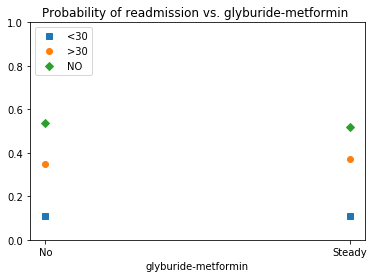

In [144]:
i_char=np.array(df['glyburide-metformin'].value_counts().keys().tolist())
L=len(i_char)
Lj=len(j_readim)

x_char = np.array([])
y_char = np.array([])


i = 0

while i < L:
    n = max(1,df['readmitted'][df['glyburide-metformin'] == i_char[i]].count())
    
    if n > 100:
        x_char = np.append(x_char,i_char[i])
        j=0
        while j < Lj:
            x = df['readmitted'][df['glyburide-metformin']== i_char[i]][df['readmitted'] == j_readim[j]].count()/n                
            y_char = np.append(y_char,x)
            j+=1
    i+=1
                                  
L1=len(x_char)    
y_char=np.resize(y_char,(L1,Lj))

plt.plot(x_char,y_char[:,0],label='<30',marker=mark[0],linestyle='none') 
plt.plot(x_char,y_char[:,1],label='>30',marker=mark[1],linestyle='none') 
plt.plot(x_char,y_char[:,2],label='NO',marker=mark[2],linestyle='none') 
plt.title('Probability of readmission vs. glyburide-metformin ')
plt.xlabel('glyburide-metformin')
plt.legend(loc='upper left')
plt.ylim(0, 1)

Text(0.5,1,'Data distrbution: glipizide-metformin')

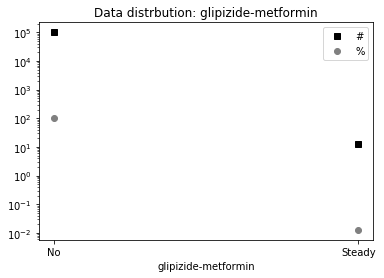

In [145]:
n_total= max(1,df['glipizide-metformin'].count())
n_count=df['glipizide-metformin'].value_counts()
Prt_count=100*n_count/n_total
plt.semilogy(n_count,marker='s',color='black',linestyle='none',label='#')
plt.semilogy(Prt_count,marker='o',color='gray',linestyle='none',label='%')
plt.xlabel('glipizide-metformin')
plt.legend(loc='upper right')
plt.title('Data distrbution: glipizide-metformin')

(0, 1)

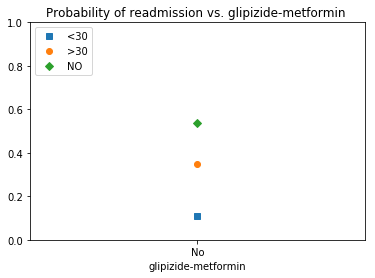

In [146]:
i_char=np.array(df['glipizide-metformin'].value_counts().keys().tolist())
L=len(i_char)
Lj=len(j_readim)

x_char = np.array([])
y_char = np.array([])


i = 0

while i < L:
    n = max(1,df['readmitted'][df['glipizide-metformin'] == i_char[i]].count())
    
    if n > 100:
        x_char = np.append(x_char,i_char[i])
        j=0
        while j < Lj:
            x = df['readmitted'][df['glipizide-metformin']== i_char[i]][df['readmitted'] == j_readim[j]].count()/n                
            y_char = np.append(y_char,x)
            j+=1
    i+=1
                                  
L1=len(x_char)    
y_char=np.resize(y_char,(L1,Lj))

plt.plot(x_char,y_char[:,0],label='<30',marker=mark[0],linestyle='none') 
plt.plot(x_char,y_char[:,1],label='>30',marker=mark[1],linestyle='none') 
plt.plot(x_char,y_char[:,2],label='NO',marker=mark[2],linestyle='none') 
plt.title('Probability of readmission vs. glipizide-metformin ')
plt.xlabel('glipizide-metformin')
plt.legend(loc='upper left')
plt.ylim(0, 1)

Text(0.5,1,'Data distrbution: glimepiride-pioglitazone')

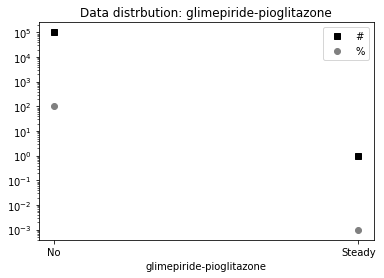

In [147]:
n_total= max(1,df['glimepiride-pioglitazone'].count())
n_count=df['glimepiride-pioglitazone'].value_counts()
Prt_count=100*n_count/n_total
plt.semilogy(n_count,marker='s',color='black',linestyle='none',label='#')
plt.semilogy(Prt_count,marker='o',color='gray',linestyle='none',label='%')
plt.xlabel('glimepiride-pioglitazone')
plt.legend(loc='upper right')
plt.title('Data distrbution: glimepiride-pioglitazone')

(0, 1)

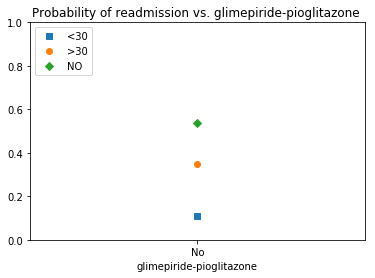

In [148]:
i_char=np.array(df['glimepiride-pioglitazone'].value_counts().keys().tolist())
L=len(i_char)
Lj=len(j_readim)

x_char = np.array([])
y_char = np.array([])


i = 0

while i < L:
    n = max(1,df['readmitted'][df['glimepiride-pioglitazone'] == i_char[i]].count())
    
    if n > 100:
        x_char = np.append(x_char,i_char[i])
        j=0
        while j < Lj:
            x = df['readmitted'][df['glimepiride-pioglitazone']== i_char[i]][df['readmitted'] == j_readim[j]].count()/n                
            y_char = np.append(y_char,x)
            j+=1
    i+=1
                                  
L1=len(x_char)    
y_char=np.resize(y_char,(L1,Lj))

plt.plot(x_char,y_char[:,0],label='<30',marker=mark[0],linestyle='none') 
plt.plot(x_char,y_char[:,1],label='>30',marker=mark[1],linestyle='none') 
plt.plot(x_char,y_char[:,2],label='NO',marker=mark[2],linestyle='none') 
plt.title('Probability of readmission vs. glimepiride-pioglitazone ')
plt.xlabel('glimepiride-pioglitazone')
plt.legend(loc='upper left')
plt.ylim(0, 1)

Text(0.5,1,'Data distrbution: metformin-rosiglitazone')

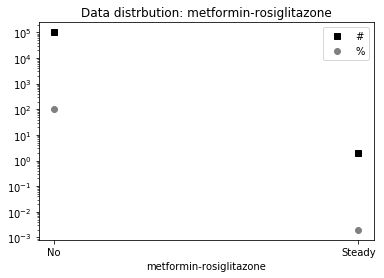

In [171]:
n_total= max(1,df['metformin-rosiglitazone'].count())
n_count=df['metformin-rosiglitazone'].value_counts()
Prt_count=100*n_count/n_total
plt.semilogy(n_count,marker='s',color='black',linestyle='none',label='#')
plt.semilogy(Prt_count,marker='o',color='gray',linestyle='none',label='%')
plt.xlabel('metformin-rosiglitazone')
plt.legend(loc='upper right')
plt.title('Data distrbution: metformin-rosiglitazone')

(0, 1)

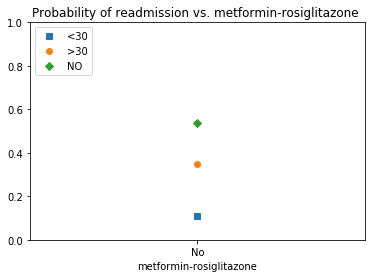

In [172]:
i_char=np.array(df['metformin-rosiglitazone'].value_counts().keys().tolist())
L=len(i_char)
Lj=len(j_readim)

x_char = np.array([])
y_char = np.array([])


i = 0

while i < L:
    n = max(1,df['readmitted'][df['metformin-rosiglitazone'] == i_char[i]].count())
    
    if n > 100:
        x_char = np.append(x_char,i_char[i])
        j=0
        while j < Lj:
            x = df['readmitted'][df['metformin-rosiglitazone']== i_char[i]][df['readmitted'] == j_readim[j]].count()/n                
            y_char = np.append(y_char,x)
            j+=1
    i+=1
                                  
L1=len(x_char)    
y_char=np.resize(y_char,(L1,Lj))

plt.plot(x_char,y_char[:,0],label='<30',marker=mark[0],linestyle='none') 
plt.plot(x_char,y_char[:,1],label='>30',marker=mark[1],linestyle='none') 
plt.plot(x_char,y_char[:,2],label='NO',marker=mark[2],linestyle='none') 
plt.title('Probability of readmission vs. metformin-rosiglitazone ')
plt.xlabel('metformin-rosiglitazone')
plt.legend(loc='upper left')
plt.ylim(0, 1)

Text(0.5,1,'Data distrbution: metformin-pioglitazone')

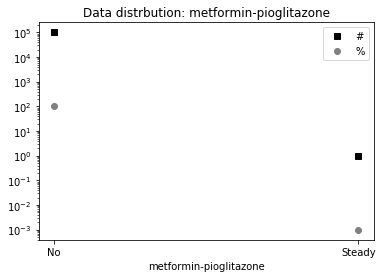

In [173]:
n_total= max(1,df['metformin-pioglitazone'].count())
n_count=df['metformin-pioglitazone'].value_counts()
Prt_count=100*n_count/n_total
plt.semilogy(n_count,marker='s',color='black',linestyle='none',label='#')
plt.semilogy(Prt_count,marker='o',color='gray',linestyle='none',label='%')
plt.xlabel('metformin-pioglitazone')
plt.legend(loc='upper right')
plt.title('Data distrbution: metformin-pioglitazone')

(0, 1)

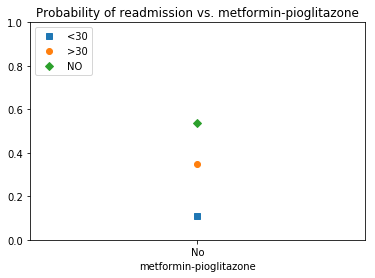

In [174]:
i_char=np.array(df['metformin-pioglitazone'].value_counts().keys().tolist())
L=len(i_char)
Lj=len(j_readim)

x_char = np.array([])
y_char = np.array([])


i = 0

while i < L:
    n = max(1,df['readmitted'][df['metformin-pioglitazone'] == i_char[i]].count())
    
    if n > 100:
        x_char = np.append(x_char,i_char[i])
        j=0
        while j < Lj:
            x = df['readmitted'][df['metformin-pioglitazone']== i_char[i]][df['readmitted'] == j_readim[j]].count()/n                
            y_char = np.append(y_char,x)
            j+=1
    i+=1
                                  
L1=len(x_char)    
y_char=np.resize(y_char,(L1,Lj))

plt.plot(x_char,y_char[:,0],label='<30',marker=mark[0],linestyle='none') 
plt.plot(x_char,y_char[:,1],label='>30',marker=mark[1],linestyle='none') 
plt.plot(x_char,y_char[:,2],label='NO',marker=mark[2],linestyle='none') 
plt.title('Probability of readmission vs. metformin-pioglitazone')
plt.xlabel('metformin-pioglitazone')
plt.legend(loc='upper left')
plt.ylim(0, 1)

Text(0.5,1,'Data distrbution: change')

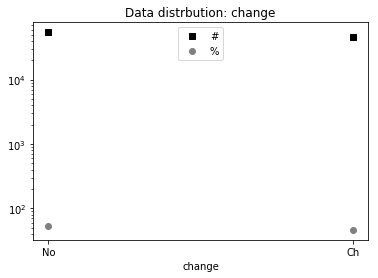

In [176]:
n_total= max(1,df['change'].count())
n_count=df['change'].value_counts()
Prt_count=100*n_count/n_total
plt.semilogy(n_count,marker='s',color='black',linestyle='none',label='#')
plt.semilogy(Prt_count,marker='o',color='gray',linestyle='none',label='%')
plt.xlabel('change')
plt.legend(loc='upper center')
plt.title('Data distrbution: change')

(0, 1)

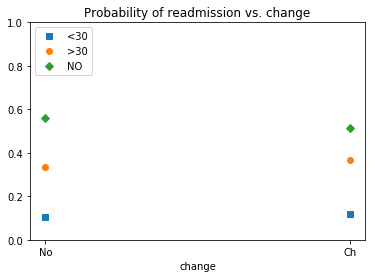

In [177]:
i_char=np.array(df['change'].value_counts().keys().tolist())
L=len(i_char)
Lj=len(j_readim)

x_char = np.array([])
y_char = np.array([])


i = 0

while i < L:
    n = max(1,df['readmitted'][df['change'] == i_char[i]].count())
    
    if n > 100:
        x_char = np.append(x_char,i_char[i])
        j=0
        while j < Lj:
            x = df['readmitted'][df['change']== i_char[i]][df['readmitted'] == j_readim[j]].count()/n                
            y_char = np.append(y_char,x)
            j+=1
    i+=1
                                  
L1=len(x_char)    
y_char=np.resize(y_char,(L1,Lj))

plt.plot(x_char,y_char[:,0],label='<30',marker=mark[0],linestyle='none') 
plt.plot(x_char,y_char[:,1],label='>30',marker=mark[1],linestyle='none') 
plt.plot(x_char,y_char[:,2],label='NO',marker=mark[2],linestyle='none') 
plt.title('Probability of readmission vs. change')
plt.xlabel('change')
plt.legend(loc='upper left')
plt.ylim(0, 1)

Text(0.5,1,'Data distrbution: diabetesMed')

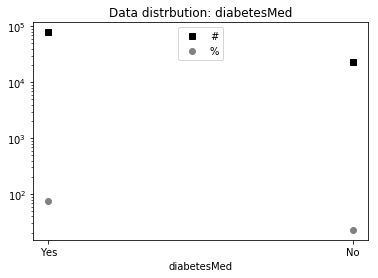

In [178]:
n_total= max(1,df['diabetesMed'].count())
n_count=df['diabetesMed'].value_counts()
Prt_count=100*n_count/n_total
plt.semilogy(n_count,marker='s',color='black',linestyle='none',label='#')
plt.semilogy(Prt_count,marker='o',color='gray',linestyle='none',label='%')
plt.xlabel('diabetesMed')
plt.legend(loc='upper center')
plt.title('Data distrbution: diabetesMed')

(0, 1)

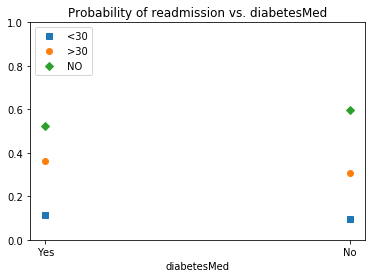

In [179]:
i_char=np.array(df['diabetesMed'].value_counts().keys().tolist())
L=len(i_char)
Lj=len(j_readim)

x_char = np.array([])
y_char = np.array([])


i = 0

while i < L:
    n = max(1,df['readmitted'][df['diabetesMed'] == i_char[i]].count())
    
    if n > 100:
        x_char = np.append(x_char,i_char[i])
        j=0
        while j < Lj:
            x = df['readmitted'][df['diabetesMed']== i_char[i]][df['readmitted'] == j_readim[j]].count()/n                
            y_char = np.append(y_char,x)
            j+=1
    i+=1
                                  
L1=len(x_char)    
y_char=np.resize(y_char,(L1,Lj))

plt.plot(x_char,y_char[:,0],label='<30',marker=mark[0],linestyle='none') 
plt.plot(x_char,y_char[:,1],label='>30',marker=mark[1],linestyle='none') 
plt.plot(x_char,y_char[:,2],label='NO',marker=mark[2],linestyle='none') 
plt.title('Probability of readmission vs. diabetesMed')
plt.xlabel('diabetesMed')
plt.legend(loc='upper left')
plt.ylim(0, 1)